In [115]:
%load_ext autoreload
%autoreload 2
from dev_interaction_util import *
from DevCvAnalysis import DevCvAnalysis
from DevCvExploratoryTools import DevCvExploratoryTools

config = load_config("config.yml") 

dropbox_data_dir = config['dropbox_data_dir']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

### DEV CV Analysis object

From Dasa's advice: Consider running correlations of predictors prior to the main analysis (and even priort to pre-registration; manually generating composite scores

In [116]:
%load_ext autoreload
%autoreload 2

from InterventionCVManager import *

dropbox_data_dir = config['dropbox_data_dir']

icvm = InterventionCVManager(dropbox_data_dir)
icvm.mode = 'full_pipeline_test'
icvm.custom_codebook_path= dropbox_data_dir + 'data_codebook_DEV - data_codebook_combined_preoptimize.csv'

#dev_cv_analysis = icvm.get_prepopulated_dev_cv_analysis(set_as_random=True)

dev_cv_analysis = icvm.get_prepopulated_dev_cv_analysis(set_as_random=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/analyses/intervention_moderation/dev_interaction_util.py:927: FutureWarning: The default value of regex will change from True to False in a future version.
  ms_groups['intervention_group'] = ms_groups['group_raw'].str.replace(r"\(.*\)","")


pre merge: 275
post merge: 270
participants in pre merge but not post merge: {'DEV280', 'DEV007', 'DEV002', 'DEV032', 'DEV022'}
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'run', 'task'],
      dtype='object')
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'run', 'task'],
      dtype='object')
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'task', 'run'],
      dtype='object')
(1037, 44)
(1037, 44)


In [117]:
full_dataset = dev_cv_analysis.get_full_dataset()

In [118]:
full_dataset.shape
full_dataset.to_csv('full_dataset.csv')

In [119]:
ind_div_predictors = dev_cv_analysis.get_main_predictor_data()
main_predictors = ind_div_predictors.columns
main_predictors

Index(['BSCS', 'EDM', 'BIS_11', 'PCS', 'RS', 'TRSQ', 'ACES_sum',
       'BFI_agreeableness', 'BFI_conscientiousness', 'BFI_extraversion',
       'BFI_neuroticism', 'BFI_openness', 'IMI_effort_importance',
       'IMI_interest_enjoyment', 'NCS_total', 'PLAN_cognitive_strategies',
       'PLAN_mental_flexibility', 'PLAN_temporal_orientation',
       'RMQ_assessment', 'TESQ_E_sum', 'SRHI_healthy_minus_unhealthy',
       'RTFS_f1_minus_f2', 'cancer_promoting_minus_preventing_craved_FCI',
       'cancer_promoting_minus_preventing_liked_FCI', 'cSES', 'age365',
       'education_own', 'SST_mean_SSD', 'SST_mean_ssrt_0',
       'ROC_Crave_Regulate_Minus_Look', 'WTP_unhealthy_minus_healthy',
       'wtp_liked_koban_kober_craving_wmapN99_boot10K_02-May-2022_notzero',
       'wtp_liked_value_association-test_z_FDR_0.01',
       'roc_reappraiseCrave_reappraisal_association-test_z_FDR_0.01',
       'roc_reappraiseCrave_abstract_association-test_z_FDR_0.01',
       'roc_reappraiseCrave_multivariate_r

In [120]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [121]:
#count the number of NA values in each column
print(ind_div_predictors.isnull().sum())

BSCS                                                                      62
EDM                                                                        0
BIS_11                                                                     0
PCS                                                                        1
RS                                                                         1
TRSQ                                                                      67
ACES_sum                                                                 144
BFI_agreeableness                                                         62
BFI_conscientiousness                                                     62
BFI_extraversion                                                          62
BFI_neuroticism                                                           62
BFI_openness                                                              62
IMI_effort_importance                                                     47

In [122]:
ind_div_predictors.to_csv("processed_predictors.csv")

In [123]:
all_predictors=dev_cv_analysis.get_predictor_data()

### ROI data, and null measurement functions

Maybe we should do the factor analysis separately for the for the neural brain data and for the self report data set. The reason for this is that otherwise, there are too many missing values, and I'd rather not use imputation for missing data here because  Idon't know what the effects of that will be on the factor analysis.

Additionally we can remove some of the self report columns that have large numbers of missing rows, and that way we can get a Factor analysis that will factor analyse the majority of the data set--even if we're unable to do absolutely everything. furthermore for both the self report Collins in the neural brain data, let's do it on all the available data within those subsets, before the combination. that will enable us to get the most powerful factor analysis amongst those subsets. I think that's the right way to approach it

In [124]:
#get neural data

roi_data = load_roi_data(dev_cv_analysis.dropbox_data_dir)

def compare_null_not_null(df):
    #count the null and not null values in each column
    is_null = df.isnull().sum()
    is_not_null = (df.isnull()==False).sum()
    null_not_null_data = pd.concat([is_null, is_not_null], axis=1, keys=['is_null', 'is_not_null'])
    null_not_null_data['prop_null'] = null_not_null_data.is_null / (null_not_null_data.is_null + null_not_null_data.is_not_null)
    return null_not_null_data

nnnd=compare_null_not_null(roi_data)

def print_null_not_null_data(nnnd):
    #print all rows no mater how many there are
    row_display=pd.get_option('display.max_rows')
    pd.set_option('display.max_rows', None)
    print(nnnd)
    pd.set_option('display.max_rows', row_display)


print_null_not_null_data(nnnd)

Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'run', 'task'],
      dtype='object')
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'run', 'task'],
      dtype='object')
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'task', 'run'],
      dtype='object')
                                                    is_null  is_not_null  \
subject_id                                                0          239   
roc_lookCrave_abstract_association-test_z_FDR_0.01       35          204   
roc_lookCrave_attention network_association-tes...       35          204   
roc_lookCrave_koban_kober_craving_wmapN99_boot1...       35          204   
roc_lookCrave_motor_control_striatum_joint_mask          35          204   
roc_lookCrave_multivariate_regulation                    35        

In [125]:
#get raw self reprt data

data_by_ppt = pd.read_csv(dev_cv_analysis.data_by_ppt_path)
null_not_null_data =compare_null_not_null(data_by_ppt)



print_null_not_null_data(null_not_null_data.sort_values(by='prop_null', ascending=False))

#remove coluns with IPAQ in the name because the data isn't complete enough to include
data_by_ppt = data_by_ppt.drop(columns=data_by_ppt.columns[data_by_ppt.columns.str.contains('IPAQ')])


                                              is_null  is_not_null  prop_null
cancer_promoting_minus_preventing_craved_FFQ     1069            0   1.000000
cancer_promoting_minus_preventing_liked_FFQ      1069            0   1.000000
FFQ_NutrientDensity_12mopost                      907          162   0.848457
FFQ_NutrientDensity_6mopost                       867          202   0.811038
FFQ_NutrientDensity_3mopost                       860          209   0.804490
FFQ_NutrientDensity_1wkpost                       849          220   0.794200
FFQ_NutrientDensity_baseline                      811          258   0.758653
IPAQ_MET_kCal                                     543          526   0.507951
IPAQ_total_METminutes                             502          567   0.469598
IPAQ_walkingMETminutes                            387          682   0.362021
IPAQ_walkingminutes                               387          682   0.362021
cSES                                              344          7

In [126]:
print_null_not_null_data(null_not_null_data[null_not_null_data.index.str.contains("SST")])

                            is_null  is_not_null  prop_null
SST_CorrectGo                    16         1053   0.014967
SST_CorrectStop                  16         1053   0.014967
SST_Cue                          16         1053   0.014967
SST_FailedGo                     31         1038   0.028999
SST_FailedStop                   25         1044   0.023386
SST_prop_successful_stops        32         1037   0.029935
SST_go_trial_reaction_time       18         1051   0.016838
SST_mean_ssrt_0                  67         1002   0.062675
SST_mean_SSD                     16         1053   0.014967
SST_PECG_mean                   105          964   0.098223
SST_PCCG_mean                   105          964   0.098223
SST_PostErrorSlowW1_mean        105          964   0.098223
SST_PECG_median                 105          964   0.098223
SST_PCCG_median                 105          964   0.098223
SST_PostErrorSlowW1_median      105          964   0.098223


### divide up data_by_ppt based on codebook

The following code splits up the data into separate categories: demographicioral, neural, and self-report, because when we were putting them together, there weren't enough complete rows to do a meaningful factor analysis.

In [127]:
#get the codebook
data_codebook = pd.read_csv(dev_cv_analysis.data_codebook_path,skiprows=1)

aim3_predictor_status = data_codebook['Aim3PredictorsFinal']
aim3_predictors = data_codebook.loc[aim3_predictor_status, 'VarName'].tolist()


Now go through the categories and create a separate df for each

In [128]:

#split the columns in data_by_ppt into three separate dataframes based on their Category in data_codebook
category_data_dict = {}

for category in data_codebook['Category'].unique():
    #display markdown header for this category
    display(Markdown("## " + category))
    
    #within this category, get the columns that are in data_by_ppt
    cols_in_category = data_codebook[data_codebook['Category']==category]['VarName']
    #get the subset of relevant_cols that are in data_by_ppt
    relevant_cols = cols_in_category[cols_in_category.isin(data_by_ppt.columns)]

    #get the subset of data_by_ppt that is in this category of data
    relevant_subset = data_by_ppt[relevant_cols]
    
    #remove any rows where ALL values are NA within this category
    print(relevant_subset.shape)
    relevant_subset = relevant_subset.dropna(how='all')
    print(relevant_subset.shape)
    

    #now get specific proprtions of null values for each column within this subset
    prop_null_table = compare_null_not_null(relevant_subset)
    #and remove any columns that have more than 20% null values
    cols_to_remove = prop_null_table[prop_null_table['prop_null']>0.2].index
    print("columns omitted because more than 20% of rows were null:")
    print(cols_to_remove)
    relevant_subset = relevant_subset.drop(columns=cols_to_remove)

    #now drop all rows that have any null values
    relevant_subset = relevant_subset.dropna()
    print("after dropping rows with any null values:")
    print(relevant_subset.shape)

    #save this subset to the dict
    category_data_dict[category] = relevant_subset
    print("cols retained:")
    print(category_data_dict[category].columns)

#remove the item with key 'outcome' from the dict
del category_data_dict['outcome']

## self-report

(1069, 66)
(1069, 66)
columns omitted because more than 20% of rows were null:
Index(['RTFS_factor_1', 'RTFS_f1_minus_f2'], dtype='object')
after dropping rows with any null values:
(732, 64)
cols retained:
Index(['BSCS', 'EDM', 'BIS_11', 'PCS', 'RS', 'TRSQ',
       'ACES_neglectful_parenting', 'ACES_abuse', 'ACES_sum',
       'ACES_divorced_separated', 'ACES_household_dysfunction',
       'BFI_agreeableness', 'BFI_conscientiousness', 'BFI_extraversion',
       'BFI_neuroticism', 'BFI_openness', 'DEMO_mcarthur_social_standing',
       'IMI_effort_importance', 'IMI_value_usefulness',
       'IMI_interest_enjoyment', 'IMI_perceived_choice',
       'IMI_perceived_competence', 'NCS_get_job_done', 'NCS_intellectual_task',
       'NCS_deliberating_issues', 'NCS_like_responsibility',
       'NCS_thinking_not_exciting', 'NCS_avoid_depth', 'NCS_thinking_not_fun',
       'NCS_thought_appealing', 'NCS_think_minimally', 'NCS_prefer_complex',
       'NCS_prefer_little_thought', 'NCS_relief_not_sati

## outcome

(1069, 17)
(1069, 17)
columns omitted because more than 20% of rows were null:
Index(['cancer_promoting_minus_preventing_craved_FFQ',
       'cancer_promoting_minus_preventing_liked_FFQ',
       'FFQ_NutrientDensity_baseline', 'FFQ_NutrientDensity_1wkpost',
       'FFQ_NutrientDensity_3mopost', 'FFQ_NutrientDensity_6mopost',
       'FFQ_NutrientDensity_12mopost'],
      dtype='object')
after dropping rows with any null values:
(972, 10)
cols retained:
Index(['cancer_promoting_minus_preventing_FFQ', 'cancer_promoting_FFQ',
       'cancer_preventing_FFQ', 'bf_1', 'weight_0', 'bmi_0', 'bmi_1', 'bmi',
       'bf_1_controlled', 'bf_1_bsexnormedzs'],
      dtype='object')


## ID

(1069, 1)
(1069, 1)
columns omitted because more than 20% of rows were null:
Index([], dtype='object')
after dropping rows with any null values:
(1069, 1)
cols retained:
Index(['SID'], dtype='object')


## demographic

(1069, 10)
(1069, 10)
columns omitted because more than 20% of rows were null:
Index(['cSES'], dtype='object')
after dropping rows with any null values:
(853, 9)
cols retained:
Index(['height_0', 'birthsex', 'age365', 'birthsex_factor', 'education_own',
       'zipcode_median_income_acs', 'household_income_level_medamount',
       'household_income_per_person', 'ses_aggregate'],
      dtype='object')


## behavioral

(1069, 25)
(1068, 25)
columns omitted because more than 20% of rows were null:
Index([], dtype='object')
after dropping rows with any null values:
(832, 25)
cols retained:
Index(['SST_CorrectGo', 'SST_CorrectStop', 'SST_Cue', 'SST_FailedGo',
       'SST_FailedStop', 'SST_prop_successful_stops',
       'SST_go_trial_reaction_time', 'SST_mean_SSD', 'SST_PECG_mean',
       'SST_PCCG_mean', 'SST_PostErrorSlowW1_mean', 'SST_PECG_median',
       'SST_PCCG_median', 'SST_mean_ssrt_0', 'SST_PostErrorSlowW1_median',
       'ROC_Crave_Look', 'ROC_Crave_Regulate', 'ROC_Neutral_Look',
       'ROC_No Crave_Look', 'ROC_Crave_Regulate_Minus_Look',
       'ROC_Crave_Minus_Neutral', 'ROC_Crave_Minus_NoCrave', 'WTP_healthy',
       'WTP_unhealthy', 'WTP_unhealthy_minus_healthy'],
      dtype='object')


## neural

(1069, 0)
(0, 0)
columns omitted because more than 20% of rows were null:
Index([], dtype='object')
after dropping rows with any null values:
(0, 0)
cols retained:
Index([], dtype='object')


Now I think we want to do separate factor analysis on these categories of things, minus outcome

The following code was used when we were going to factor analyze each separately.

## analysis for self-report data

In [129]:
data_self_report = category_data_dict['self-report']
data_self_report.shape

if 'TESQ_E_sum' in data_self_report.columns:
    data_self_report.drop(columns=['TESQ_E_sum'], inplace=True)
    
#first calculate factor analysis validity
DevCvExploratoryTools.calculate_fa_validity(data_self_report)

#now do a diagnostic fa

DevCvExploratoryTools.do_diagnostic_fa(data_self_report)








Bartlett's test of sphericity chisq, p-value:
169372.5140535934 0.0
KMO test of sampling adequacy:
0.7399985530868332


/Users/benjaminsmith/opt/anaconda3/envs/dataanalysis/lib/python3.11/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


KeyboardInterrupt: 

Based on that plot, let's look at 6 factors

In [ ]:
%load_ext autoreload
%autoreload 2
from dev_interaction_util import *
from DevCvAnalysis import DevCvAnalysis
from DevCvExploratoryTools import DevCvExploratoryTools

config = load_config("config.yml") 

dropbox_data_dir = config['dropbox_data_dir']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
fa_loadings = DevCvExploratoryTools.do_factor_analysis(data_self_report, 6)
loadings_labelled = DevCvExploratoryTools.label_factor_loadings(fa_loadings, data_self_report)

(63, 6)


<Figure size 1000x1000 with 0 Axes>

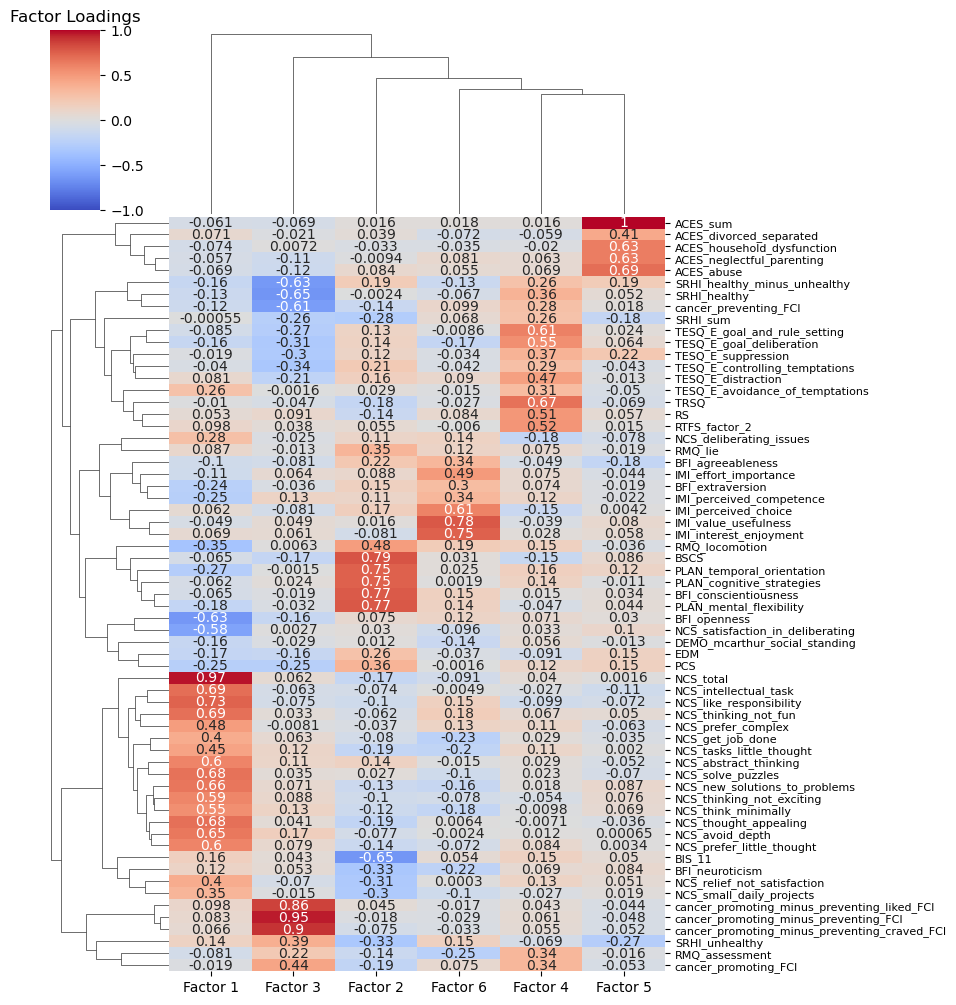

In [ ]:
DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled)

So I guess we want to remove any pairings of items that load strongly onto the same factor. We might also wanna check the correlations of those items within teh factor before removing them?

### Data within codebook

In [ ]:
data_self_report.shape

(732, 63)

In [ ]:
data_selfreport_chosen = data_self_report.loc[:,data_self_report.columns.isin(aim3_predictors)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


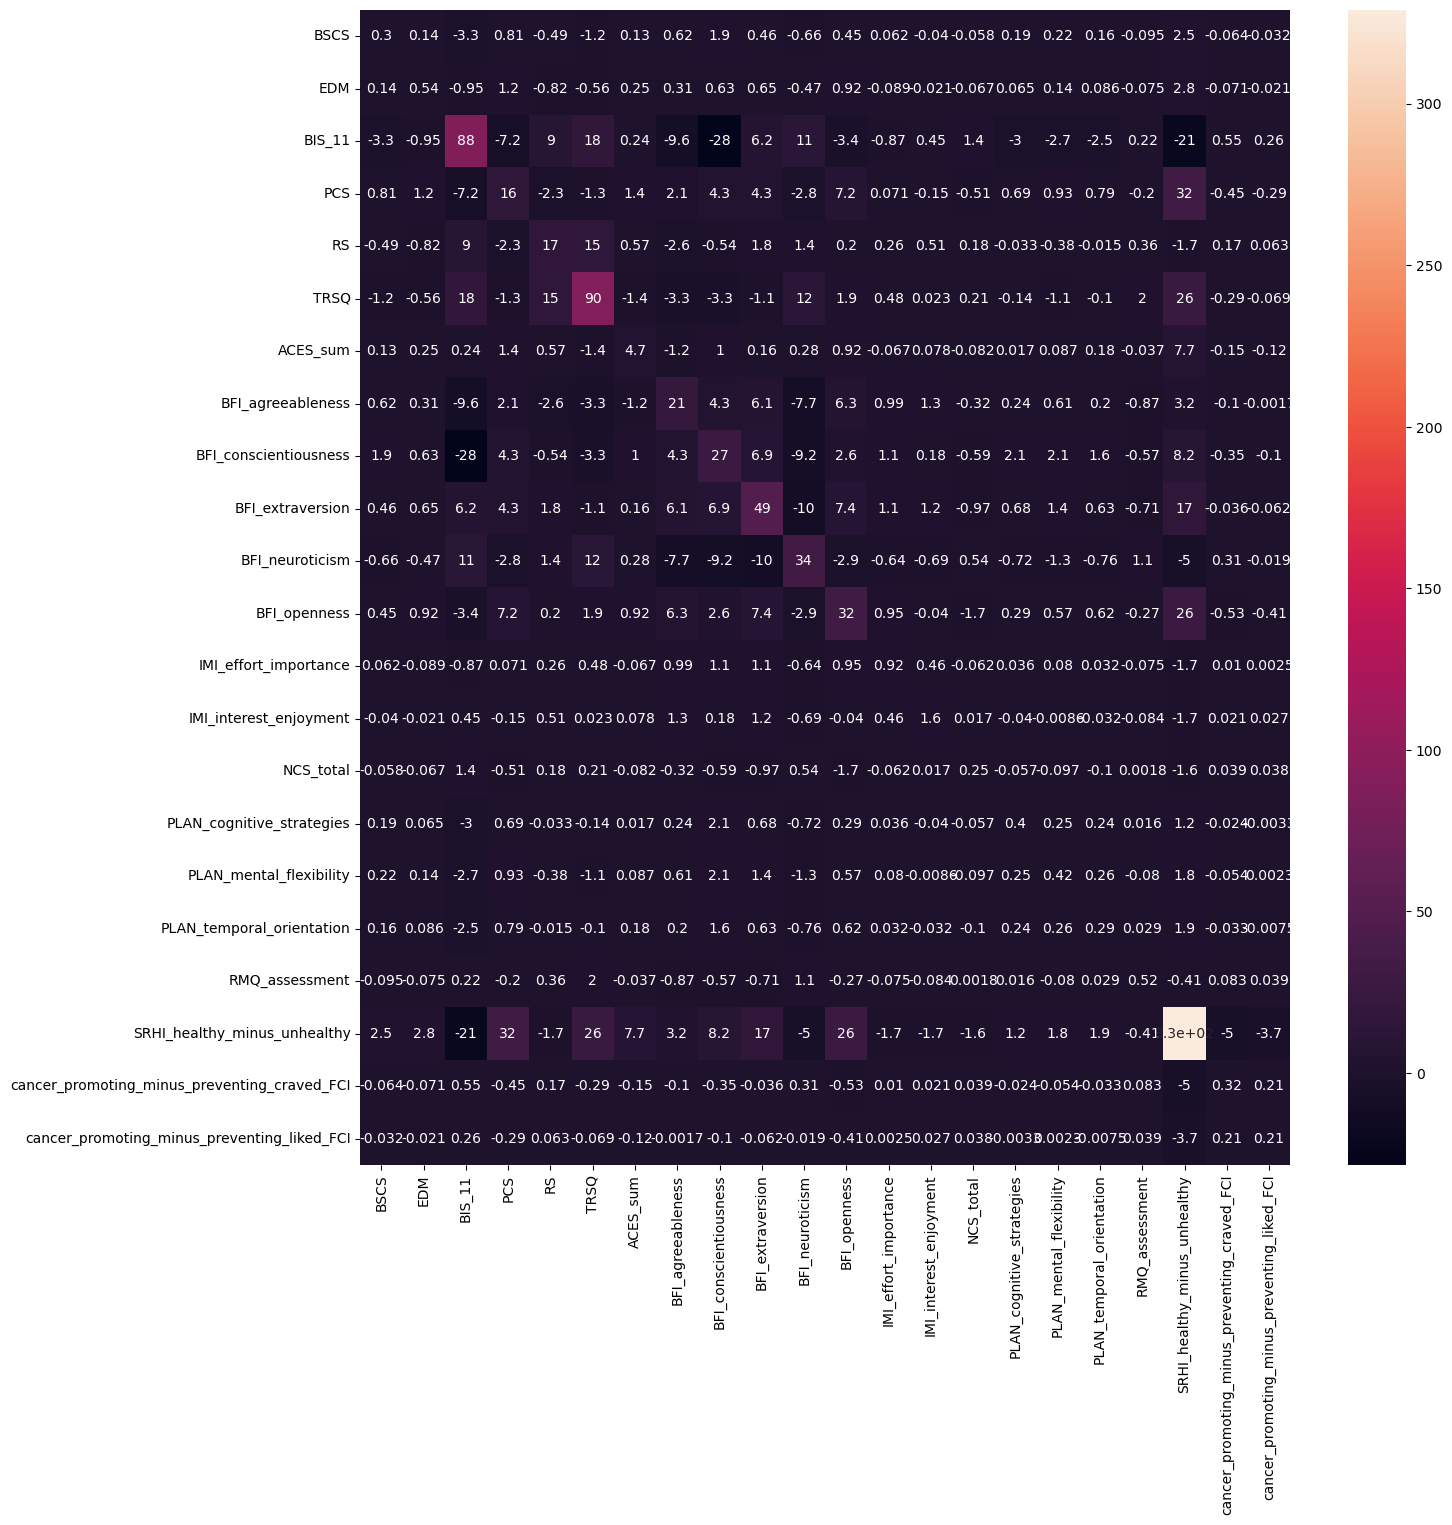

In [ ]:
%load_ext autoreload
%autoreload 2

DevCvExploratoryTools.do_cov_mat(data_selfreport_chosen)

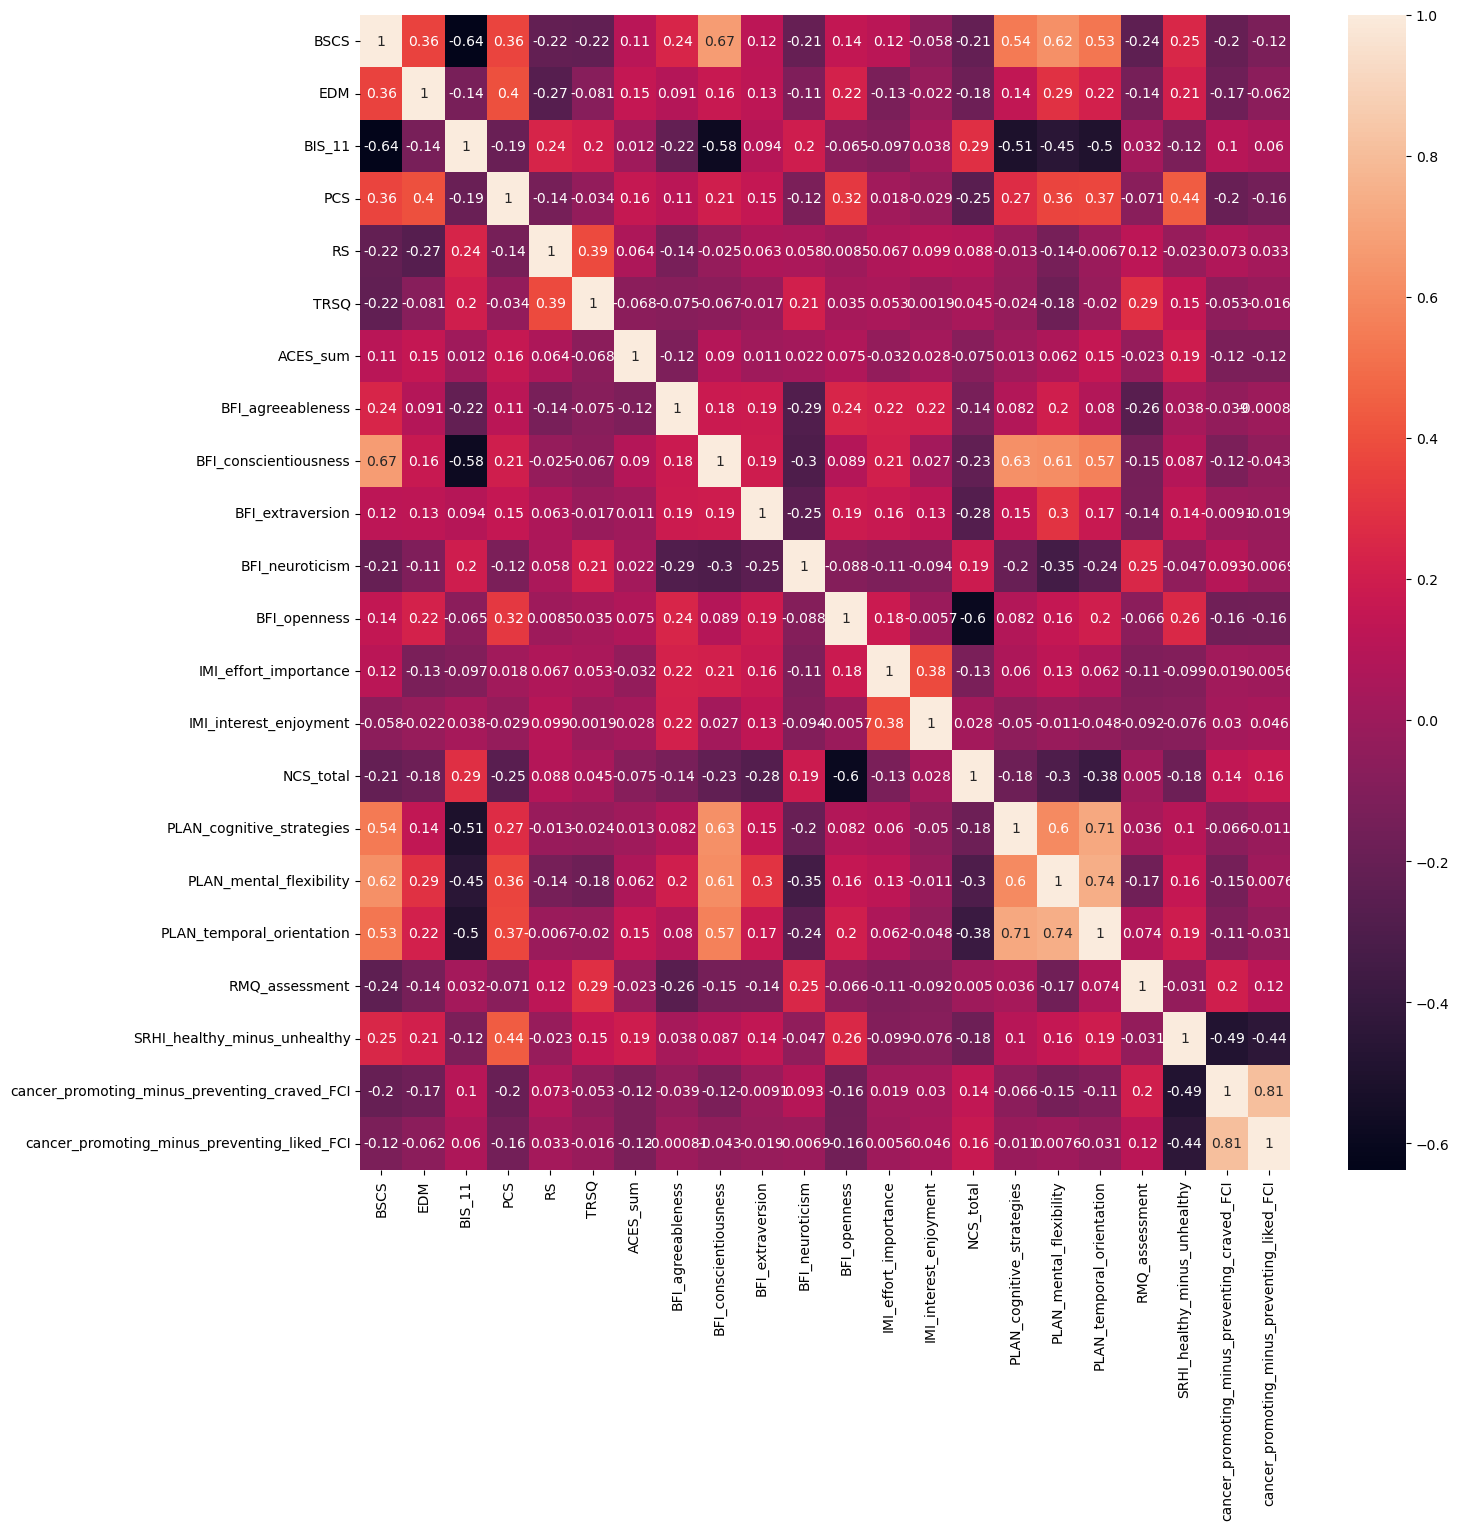

In [ ]:
DevCvExploratoryTools.do_corr_mat(data_selfreport_chosen)

Bartlett's test of sphericity chisq, p-value:
6463.30322612524 0.0
KMO test of sampling adequacy:
0.7424443469735548
generating screeplot....


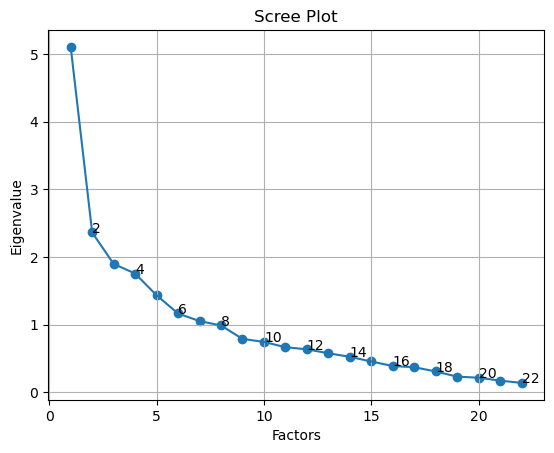

In [ ]:

#first calculate factor analysis validity
DevCvExploratoryTools.calculate_fa_validity(data_selfreport_chosen)



#now do a diagnostic fa

DevCvExploratoryTools.do_diagnostic_fa(data_selfreport_chosen)

In [ ]:
fa_loadings_behav_5 = DevCvExploratoryTools.do_factor_analysis(data_selfreport_chosen, 5)
loadings_labelled_5 = DevCvExploratoryTools.label_factor_loadings(fa_loadings_behav_5, data_selfreport_chosen)

(22, 5)


<Figure size 1000x1000 with 0 Axes>

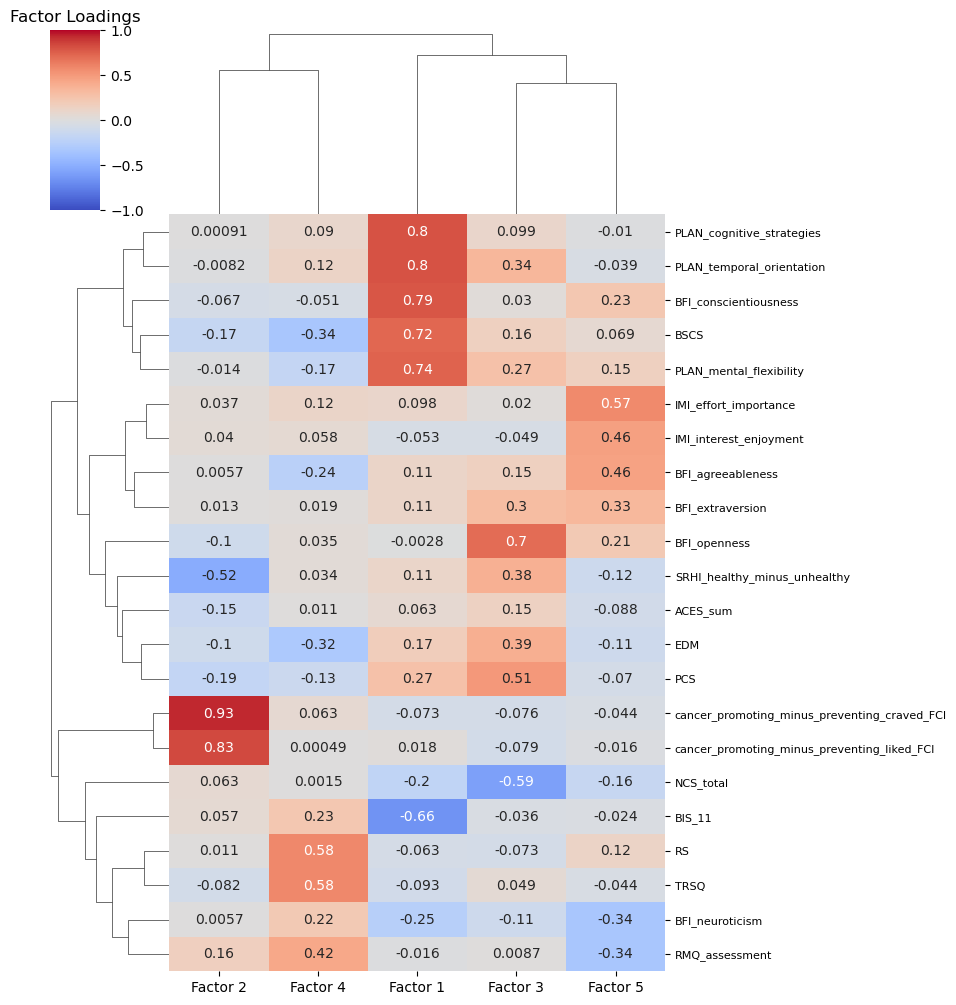

In [ ]:
DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled_5)

### Self-report items we should consider removing

 - three PLAN scales, BSCS, BIS_11, and BFI_Conscientiousness all load onto the same scale. Recommend creating a single "aggregate self control" scale out of PLAN, BIS_11, BSCS, and just including the aggregate scale and BFI_conscientiousness.
 - 'Craved' and 'Liked' FCI are highly correlated and we should consider an aggregate scale and a difference scale of the two. No point in including them both separately.
 - Another cluster is Restraint Scale TRSQ, RMQ_Assessment, and BFI Neuroticism. BUt RMQ is only weakly related. Create an aggregatie scale of TRSQ and RS; otherwise leave this alone. BFI Openness and Need for Cognition are highly inversely correlated. Probably leave them be.
 - Two IMI scales are correlatd r=0.4. Combine them.


If we take all the above recommendations, we can eliminate 8 degrees of freedom.

## Behavioral data analysis

In [ ]:
category_data_dict['behavioral'].SST_mean_SSD

2      0.247061
3      0.446583
4      0.369308
5      0.254778
6      0.417858
         ...   
980    0.311523
981    0.277445
982    0.277445
983    0.277445
984    0.277445
Name: SST_mean_ssrt_0, Length: 832, dtype: float64

In [ ]:
data_behavioral = category_data_dict['behavioral']
data_behavioral = data_behavioral.loc[:,data_behavioral.std()>0.001].copy()
data_behavioral.shape
data_behavioral.drop(['SST_CorrectGo','SST_Cue','SST_FailedStop','SST_FailedGo','SST_CorrectStop'], axis=1, inplace=True)
data_behavioral.drop(['SST_PECG_median','SST_PCCG_median','SST_PCCG_mean'], axis=1, inplace=True)
data_behavioral.drop(['SST_PostErrorSlowW1_mean'], axis=1, inplace=True)
data_behavioral.drop(['WTP_unhealthy','WTP_healthy'], axis=1, inplace=True)

<AxesSubplot: >

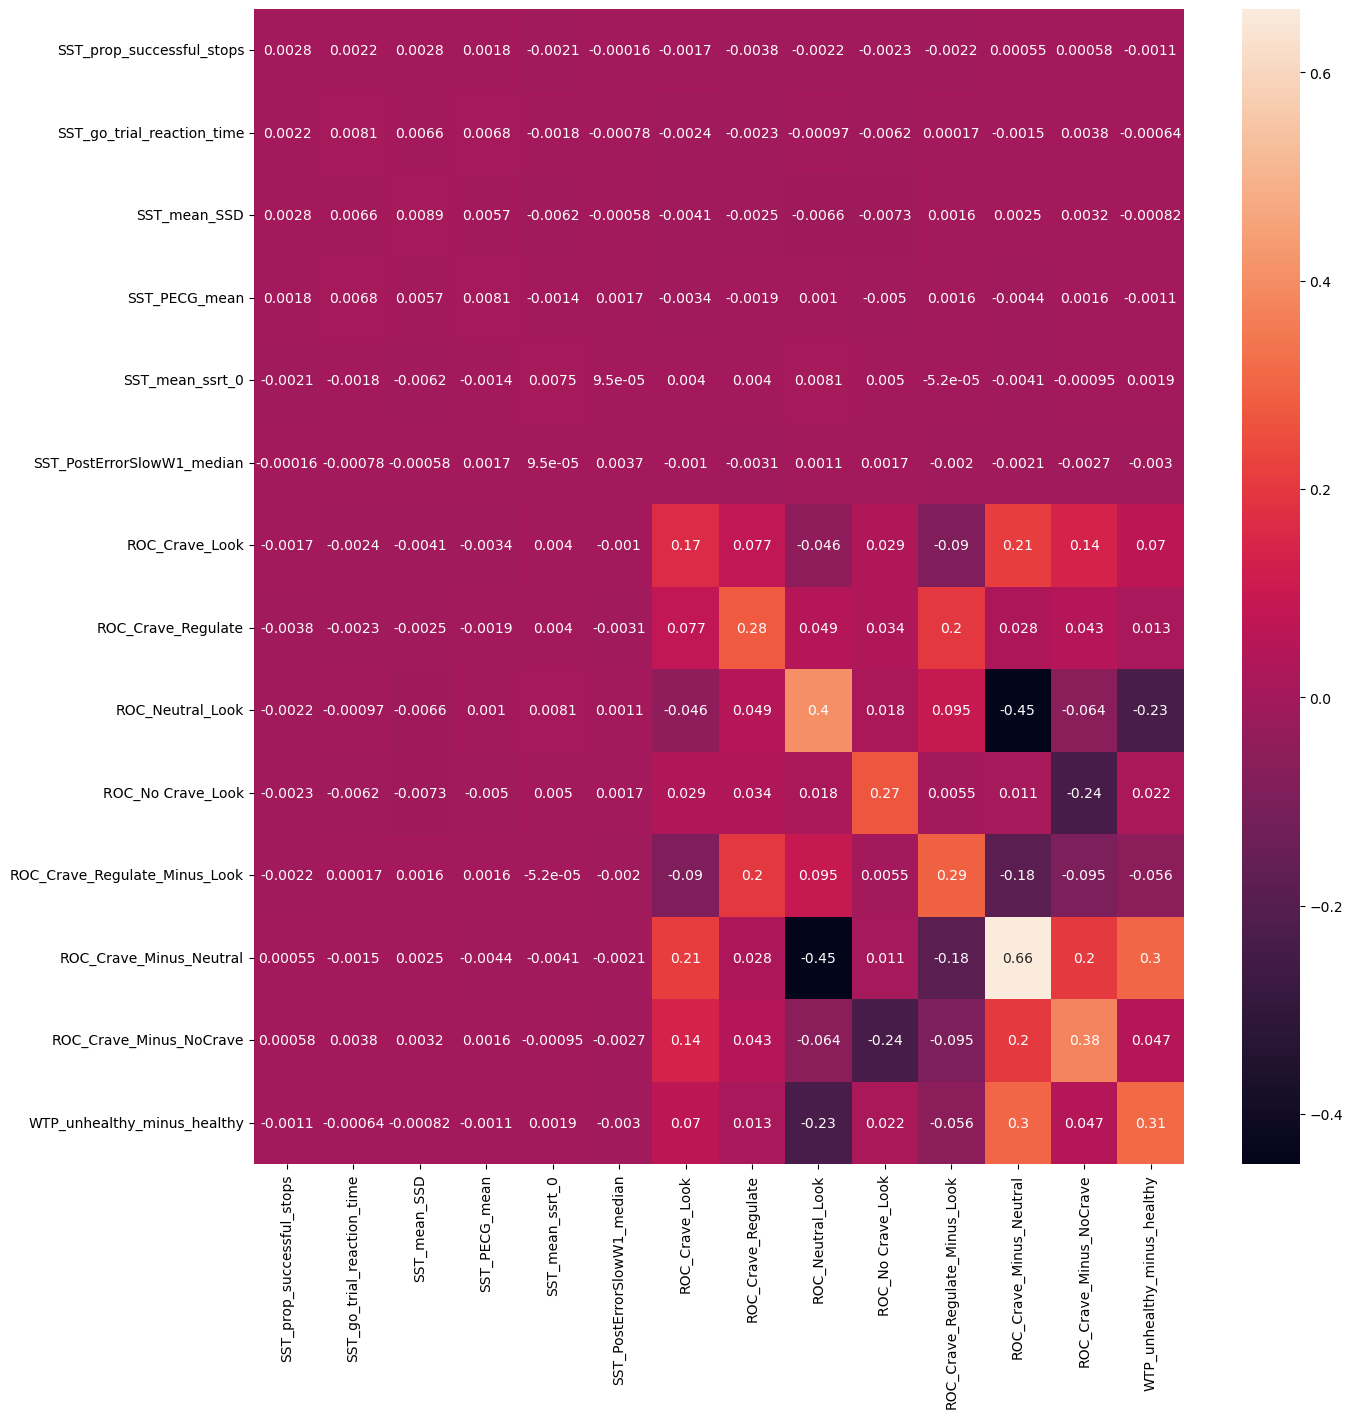

In [ ]:
import seaborn as sns
#print a covariance matrix of data_behavioral
cov_mat = data_behavioral.cov()
#display as a heatmap
#make the figure pretty big
plt.figure(figsize=(15,15))
#plot the heatmap, with covariances printed in each cell
sns.heatmap(cov_mat, annot = True)

<AxesSubplot: >

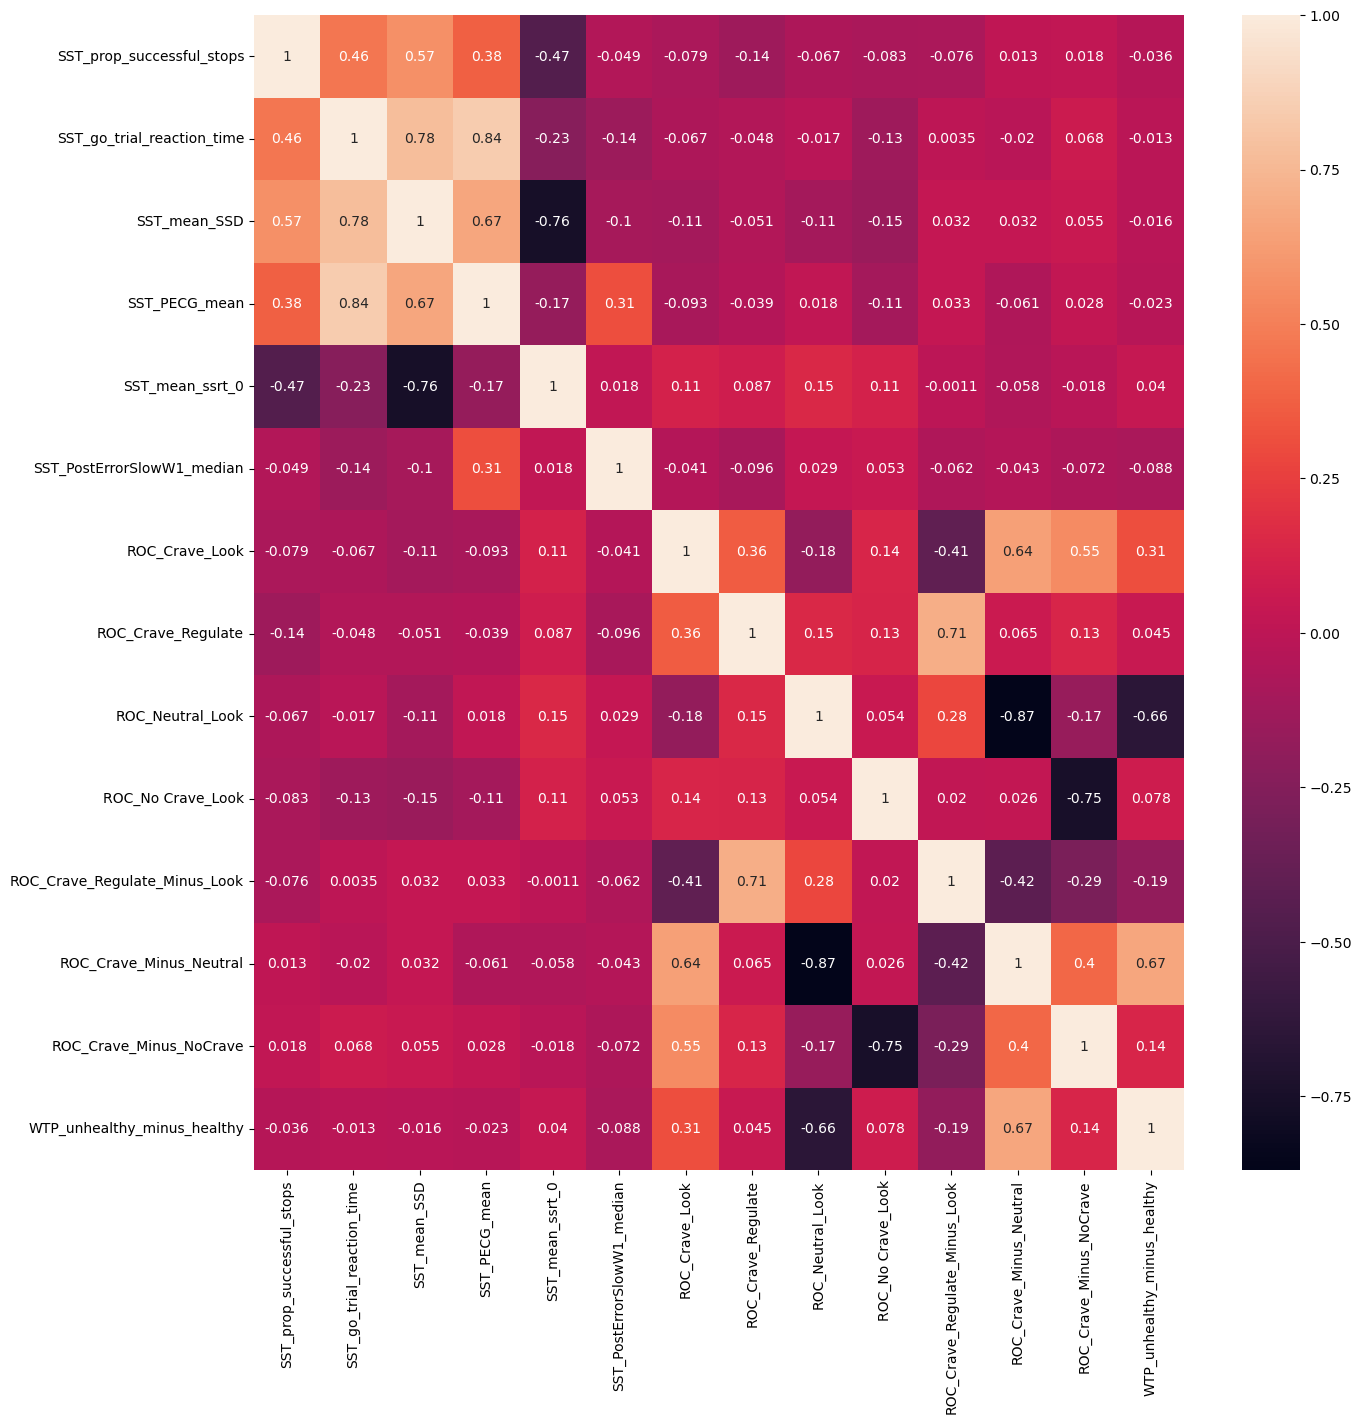

In [ ]:
#now do a plain old correlation matrix
corr_mat = data_behavioral.corr()
#display as a heatmap
plt.figure(figsize=(15,15))
#plot the heatmap
sns.heatmap(corr_mat, annot = True)

In [ ]:

#first calculate factor analysis validity
DevCvExploratoryTools.calculate_fa_validity(data_behavioral)

Bartlett's test of sphericity chisq, p-value:
92088.33295151657 0.0
KMO test of sampling adequacy:
0.5236644724061487


/Users/benjaminsmith/opt/anaconda3/envs/dataanalysis/lib/python3.11/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


generating screeplot....


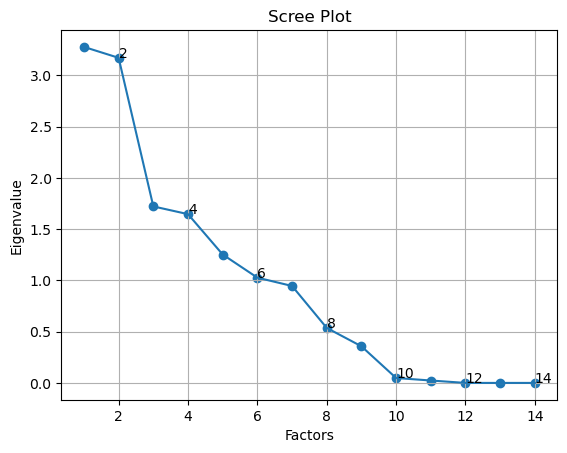

In [ ]:


#now do a diagnostic fa

DevCvExploratoryTools.do_diagnostic_fa(data_behavioral)

In [3]:
import pandas as pd
pd.Series([0,5,2,3,4]).sort_values(ascending=False)

1    5
4    4
3    3
2    2
0    0
dtype: int64

In [ ]:
fa_loadings_behav_10 = DevCvExploratoryTools.do_factor_analysis(data_behavioral, 10)
loadings_labelled_10 = DevCvExploratoryTools.label_factor_loadings(fa_loadings_behav_10, data_behavioral)

(14, 10)


<Figure size 1000x1000 with 0 Axes>

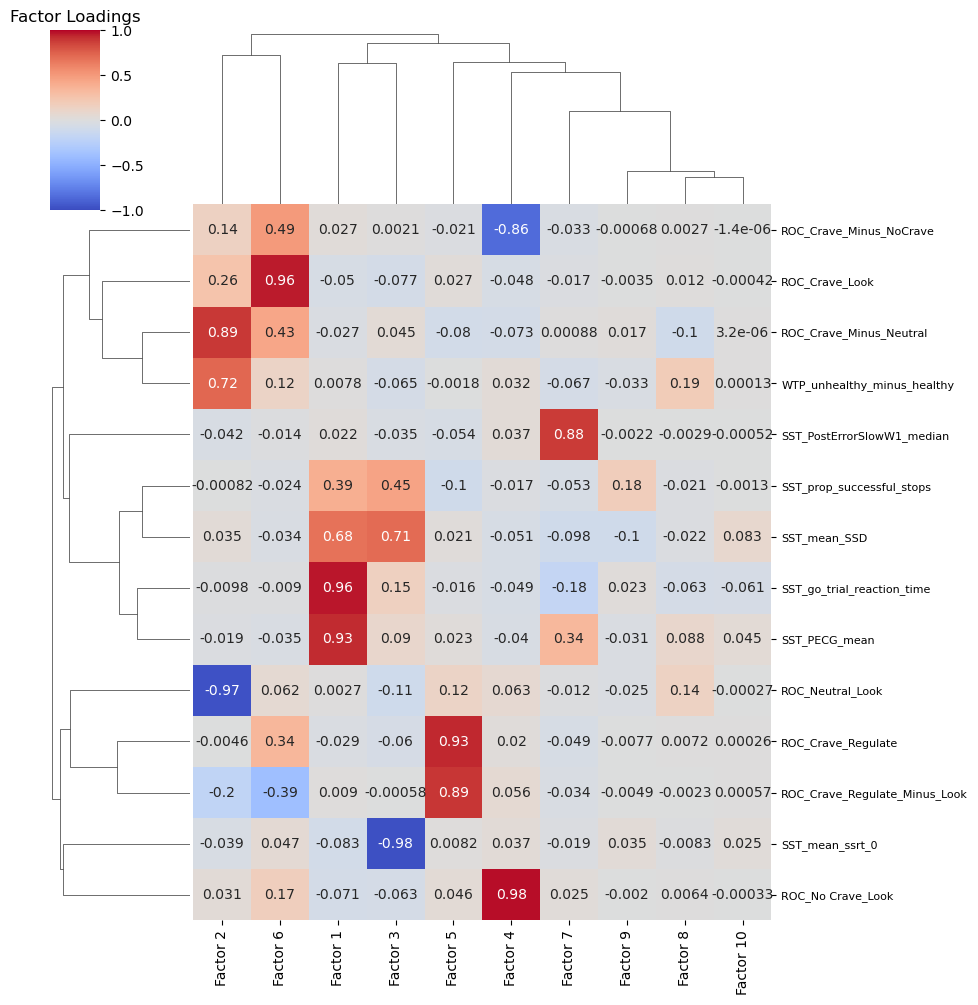

In [ ]:
DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled_10)

(14, 3)


<Figure size 1000x1000 with 0 Axes>

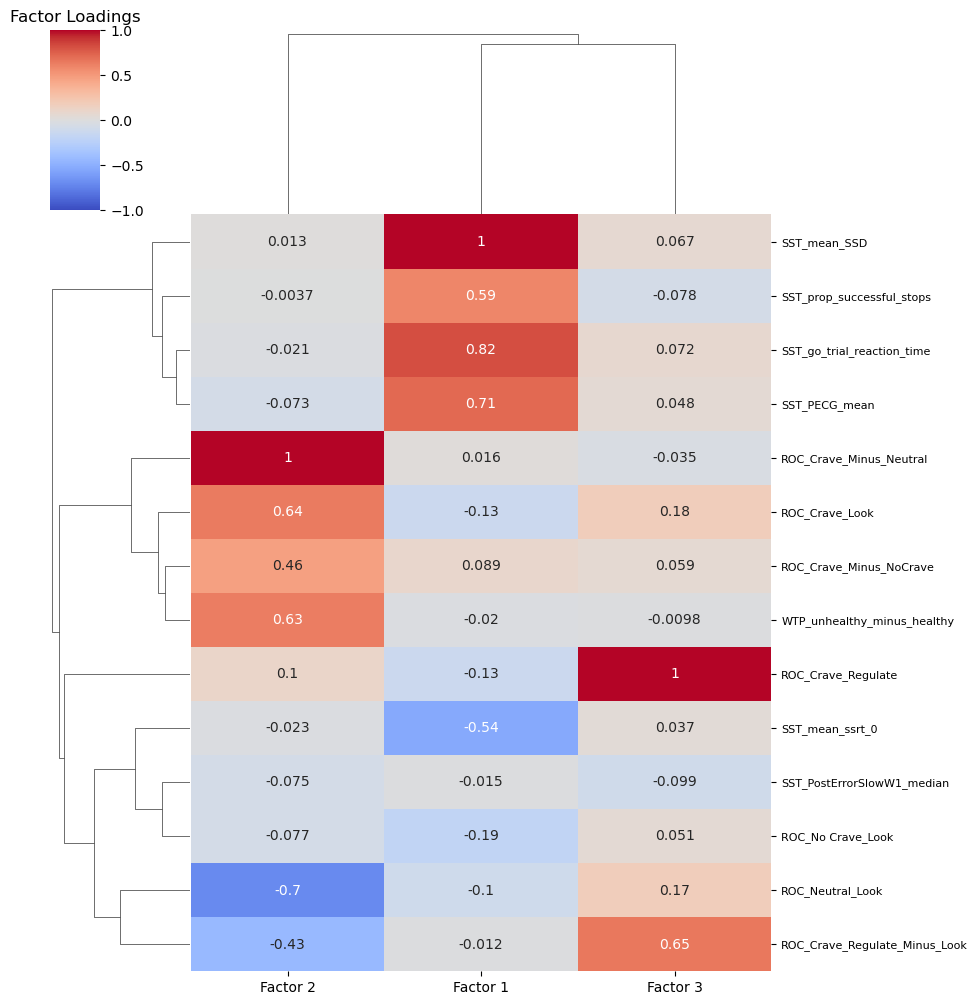

In [ ]:
fa_loadings_behav_3 = DevCvExploratoryTools.do_factor_analysis(data_behavioral, 3)
loadings_labelled_3 = DevCvExploratoryTools.label_factor_loadings(fa_loadings_behav_3, data_behavioral)

DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled_3)

### Codebook-restricted

In [ ]:
data_behavioral

SST_prop_successful_stops  SST_go_trial_reaction_time  SST_mean_SSD  \
2                      0.50000                    0.533315      0.286115   
3                      0.31250                    0.494742      0.105346   
4                      0.56250                    0.613482      0.251346   
5                      0.56250                    0.577290      0.307563   
6                      0.21875                    0.495644      0.126256   
..                         ...                         ...           ...   
980                    0.51875                    0.647782      0.288797   
981                    0.48750                    0.495412      0.244864   
982                    0.48750                    0.495412      0.244864   
983                    0.48750                    0.495412      0.244864   
984                    0.48750                    0.495412      0.244864   

     SST_PECG_mean  SST_mean_ssrt_0  SST_PostErrorSlowW1_median  \
2         0.580222         0.247061                    0.116079   
3         0.514085         0.446583                    0.013124   
4         0.704284         0.369308                    0.104440   
5         0.648019         0.254778                    0.058328   
6         0.605894         0.417858                    0.067345   
..             ...              ...                         ...   
980       0.691637         0.311523                    0.045638   
981       0.578926         0.277445                    0.087178   
982       0.578926         0.277445                    0.087178   
983       0.578926         0.277445                    0.087178   
984       0.578926         0.277445                    0.087178   

     ROC_Crave_Look  ROC_Crave_Regulate  ROC_Neutral_Look  ROC_No Crave_Look  \
2              7.50                6.70             6.300               5.45   
3              7.45                6.65             5.650               5.50   
4              7.60                6.05             6.925               5.25   
5              6.35                6.05             6.100               5.10   
6              7.15                6.60             6.950               5.80   
..              ...                 ...               ...                ...   
980            7.15                6.80             7.550               6.65   
981            7.40                6.25             6.500               6.75   
982            7.40                6.25             6.500               6.75   
983            7.40                6.25             6.500               6.75   
984            7.40                6.25             6.500               6.75   

     ROC_Crave_Regulate_Minus_Look  ROC_Crave_Minus_Neutral  \
2                            -0.80                    1.200   
3                            -0.80                    1.800   
4                            -1.55                    0.675   
5                            -0.30                    0.250   
6                            -0.55                    0.200   
..                             ...                      ...   
980                          -0.35                   -0.400   
981                          -1.15                    0.900   
982                          -1.15                    0.900   
983                          -1.15                    0.900   
984                          -1.15                    0.900   

     ROC_Crave_Minus_NoCrave  WTP_unhealthy_minus_healthy  
2                       2.05                    -0.190476  
3                       1.95                     0.170363  
4                       2.35                    -0.494624  
5                       1.25                    -0.451613  
6                       1.35                    -1.256048  
..                       ...                          ...  
980                     0.50                    -0.200893  
981                     0.65                     0.631183  
982                     0.65 

In [ ]:
", ".join(aim3_predictors)

'BSCS, EDM, BIS_11, PCS, RS, TRSQ, ACES_sum, BFI_agreeableness, BFI_conscientiousness, BFI_extraversion, BFI_neuroticism, BFI_openness, IMI_effort_importance, IMI_interest_enjoyment, NCS_total, PLAN_cognitive_strategies, PLAN_mental_flexibility, PLAN_temporal_orientation, RMQ_assessment, TESQ_E_sum, SRHI_healthy_minus_unhealthy, RTFS_f1_minus_f2, cancer_promoting_minus_preventing_craved_FCI, cancer_promoting_minus_preventing_liked_FCI, cSES, age365, birthsex_factor, education_own, SST_mean_SSD, SST_mean_ssrt_0, ROC_Crave_Regulate_Minus_Look, WTP_unhealthy_minus_healthy, wtp_liked_koban_kober_craving_wmapN99_boot10K_02-May-2022_notzero, wtp_liked_value_association-test_z_FDR_0.01, roc_reappraiseCrave_reappraisal_association-test_z_FDR_0.01, roc_reappraiseCrave_abstract_association-test_z_FDR_0.01, roc_reappraiseCrave_multivariate_regulation, roc_lookCrave_koban_kober_craving_wmapN99_boot10K_02-May-2022_notzero, sst_CorrectGo_striatum_joint_mask, sst_CorrectGo_finger movements_associatio

In [ ]:
#for behavioral data
data_behavioral_chosen = data_behavioral.loc[:,data_behavioral.columns.isin(aim3_predictors)]
data_behavioral_chosen.columns

Index(['SST_mean_SSD', 'SST_mean_ssrt_0', 'ROC_Crave_Regulate_Minus_Look',
       'WTP_unhealthy_minus_healthy'],
      dtype='object')

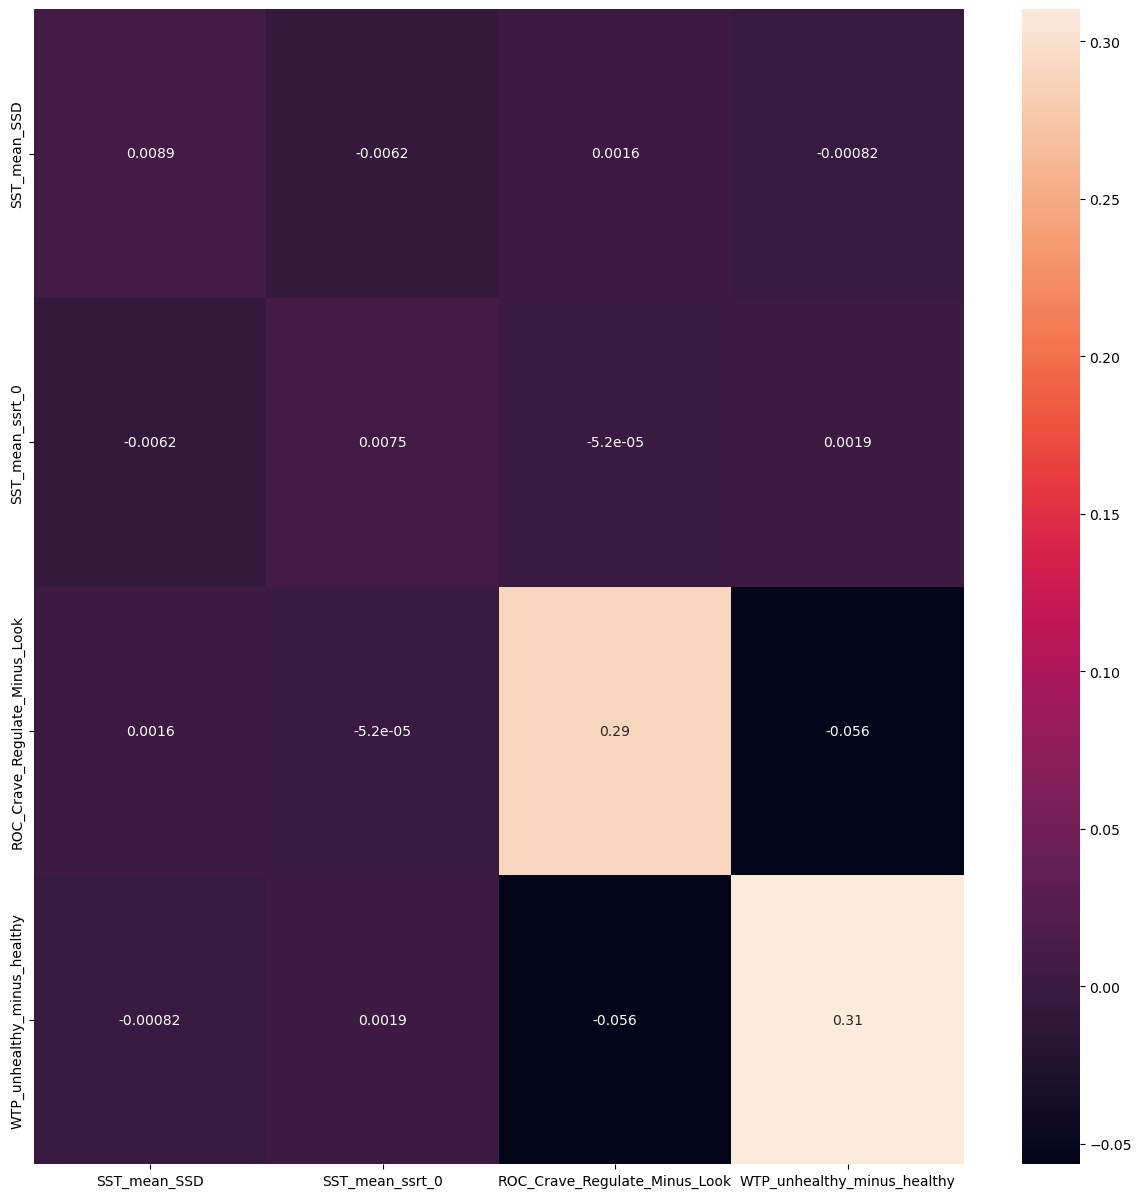

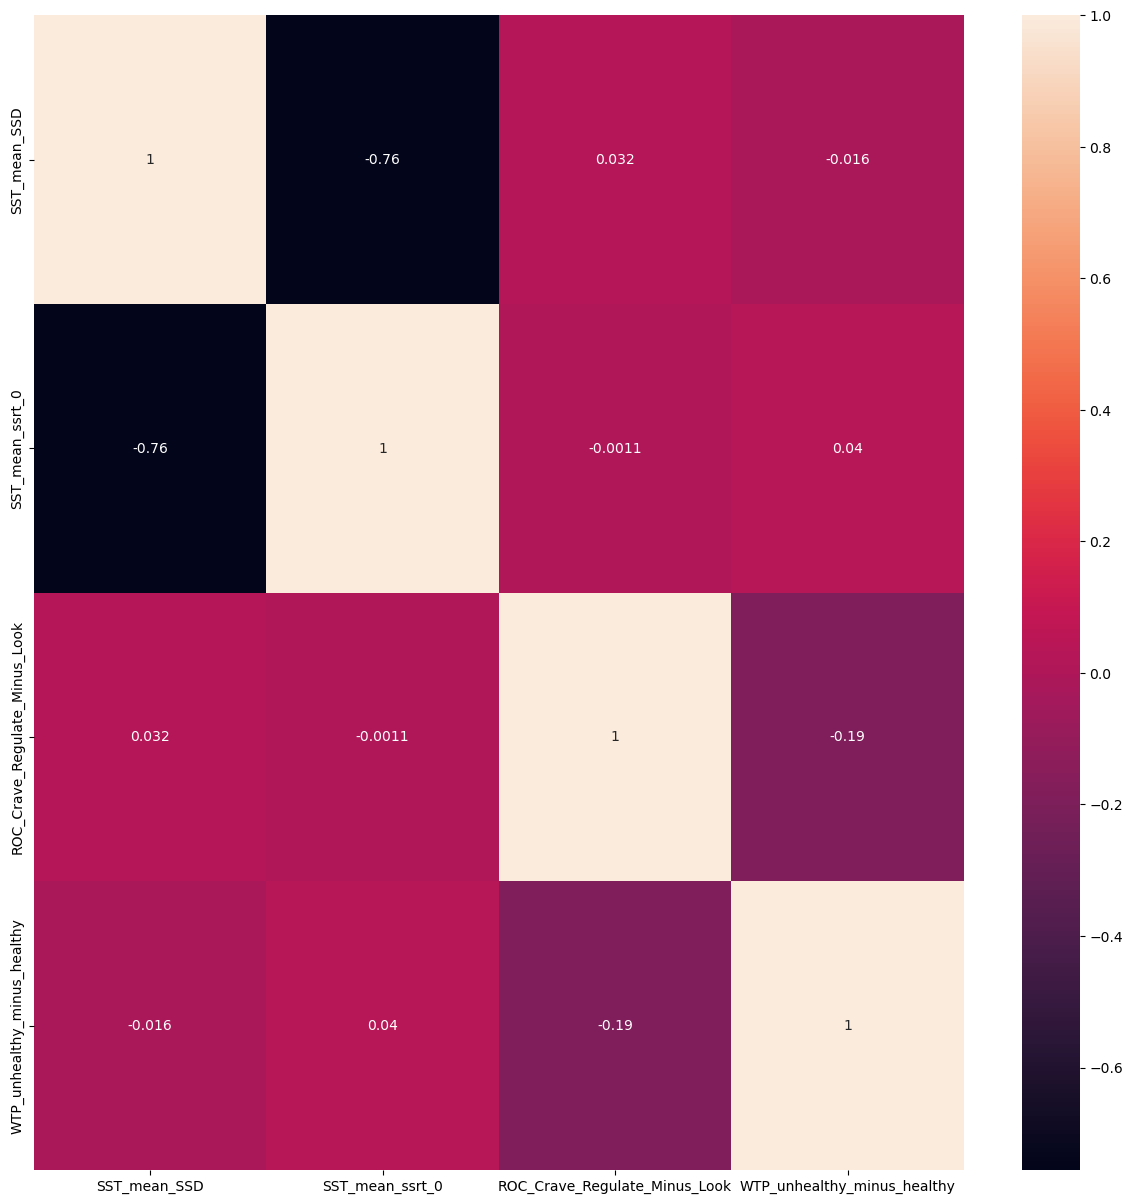

In [ ]:

DevCvExploratoryTools.do_cov_mat(data_behavioral_chosen)
DevCvExploratoryTools.do_corr_mat(data_behavioral_chosen)



generating screeplot....


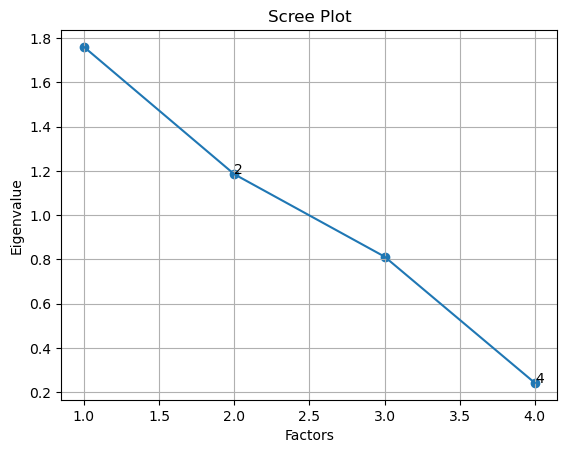

In [ ]:


#now do a diagnostic fa

DevCvExploratoryTools.do_diagnostic_fa(data_behavioral_chosen)

Based on these results, we should:

- replace SST_mean_SSD with SST_PostErrorSlowW1_median, because SST_mean_SSD is so close to SSRT, and SST_PostErrorSlowW1_median is uncorrelated.
- Include ROC_Crave_Minus_neutral

## Demographic data

In [ ]:
data_by_ppt.cSES

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1064    6.833333
1065    4.833333
1066    4.833333
1067    4.833333
1068    4.833333
Name: cSES, Length: 1069, dtype: float64

In [ ]:
category_data_dict['demographic'].cSES

AttributeError: 'DataFrame' object has no attribute 'cSES'

In [ ]:
data_demographic = category_data_dict['demographic']


In [ ]:
data_demographic.shape

(853, 7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


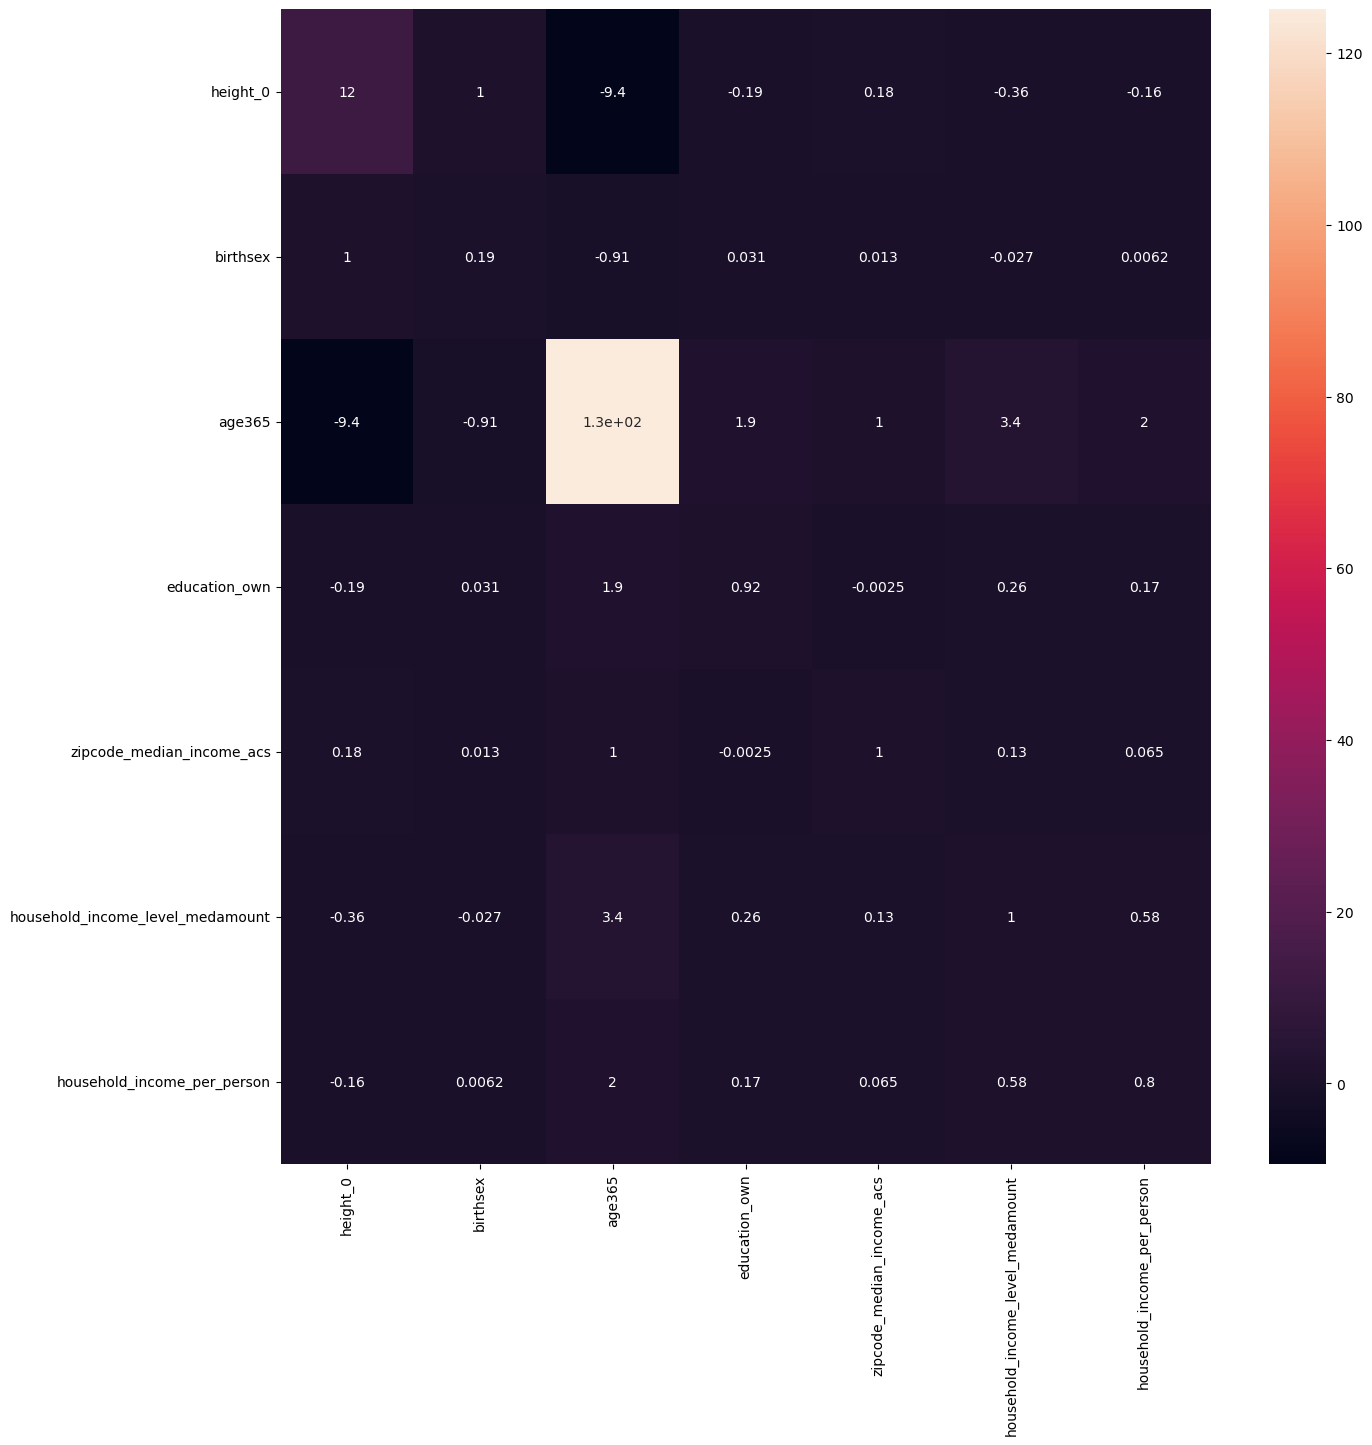

In [ ]:
%load_ext autoreload
%autoreload 2

DevCvExploratoryTools.do_cov_mat(data_demographic)

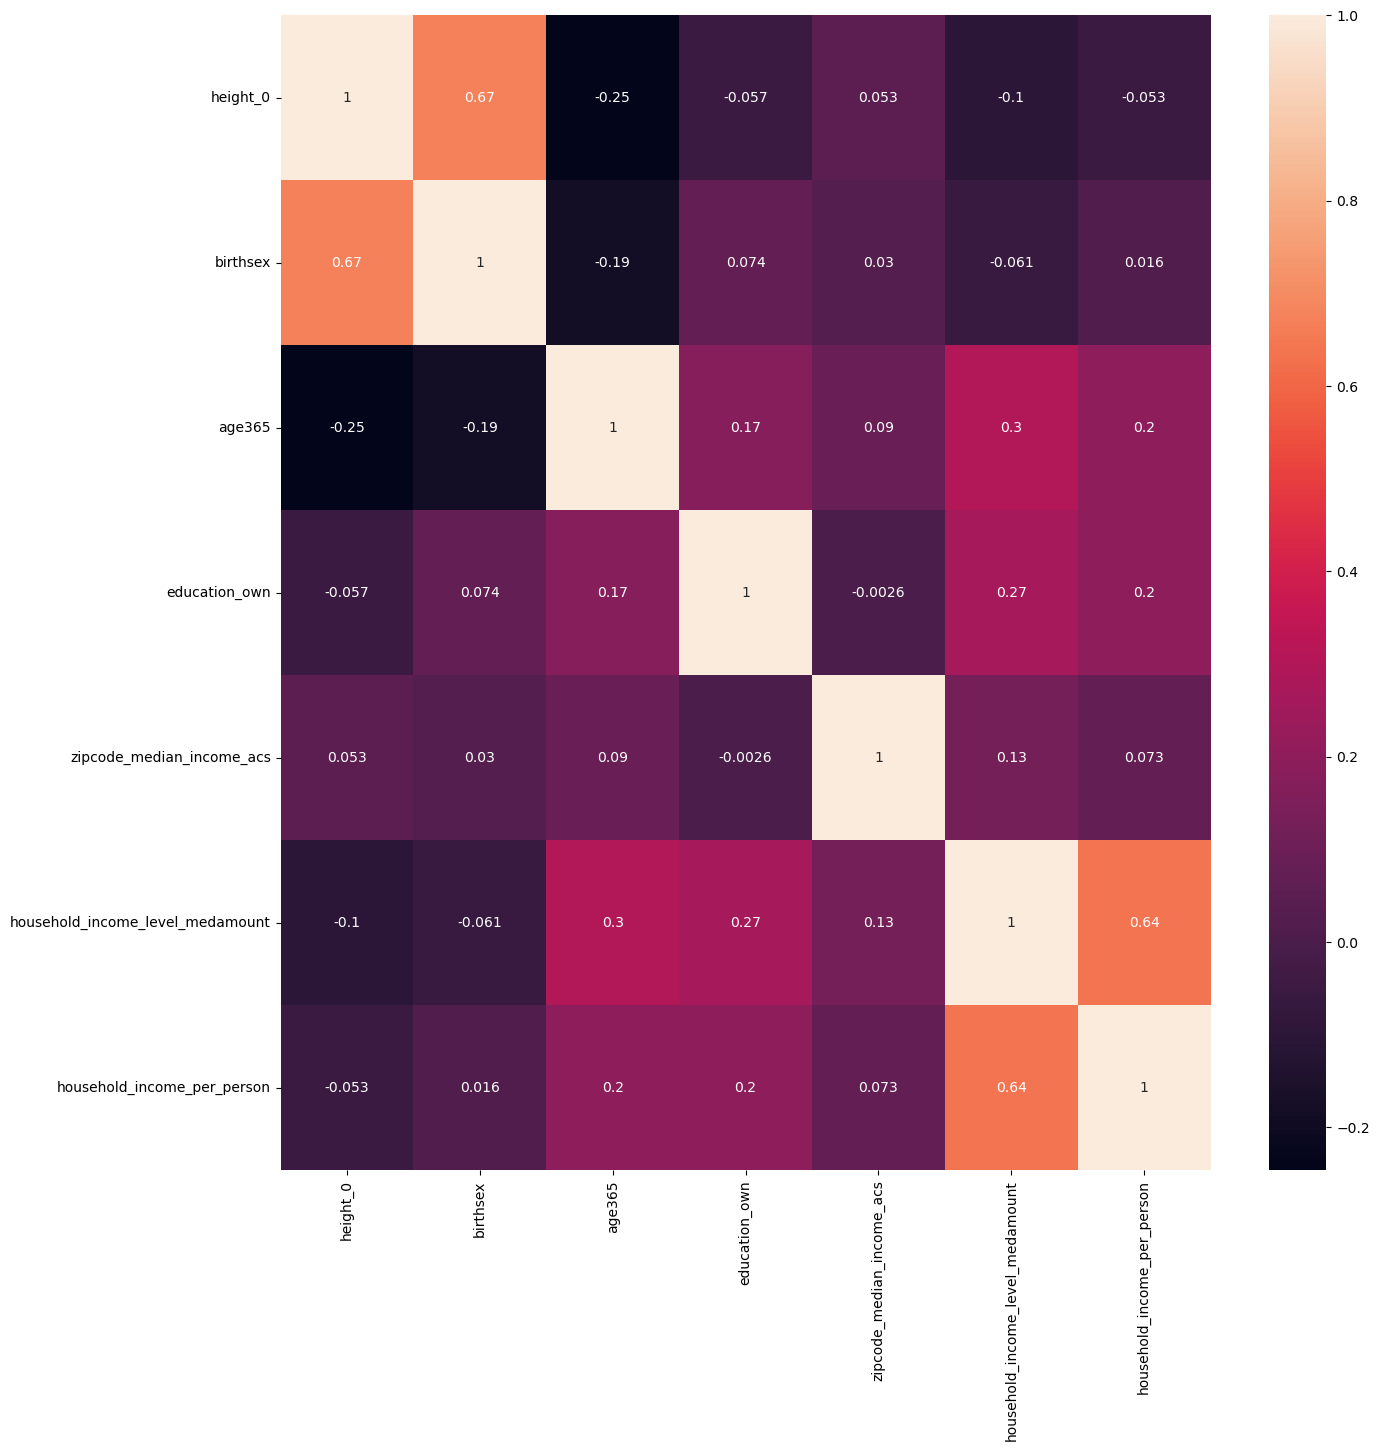

In [ ]:
DevCvExploratoryTools.do_corr_mat(data_demographic)

In [ ]:
data_demographic.drop(['ses_aggregate'], axis=1, inplace=True)
data_demographic.drop(['birthsex_factor'], axis=1, inplace=True)

KeyError: "['ses_aggregate'] not found in axis"

In [ ]:
data_demographic.columns

Index(['height_0', 'birthsex', 'age365', 'education_own',
       'zipcode_median_income_acs', 'household_income_level_medamount',
       'household_income_per_person'],
      dtype='object')

Bartlett's test of sphericity chisq, p-value:
1210.9126527382498 1.3430080803917038e-243
KMO test of sampling adequacy:
0.5705063220678244
generating screeplot....


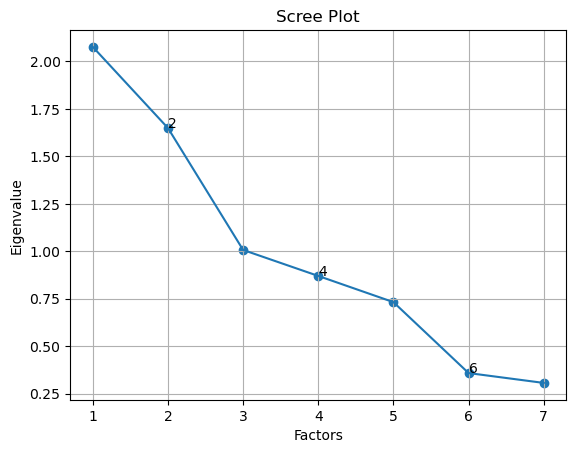

In [ ]:
#first calculate factor analysis validity
DevCvExploratoryTools.calculate_fa_validity(data_demographic)
#now do a diagnostic fa
DevCvExploratoryTools.do_diagnostic_fa(data_demographic)

(7, 3)


<Figure size 1000x1000 with 0 Axes>

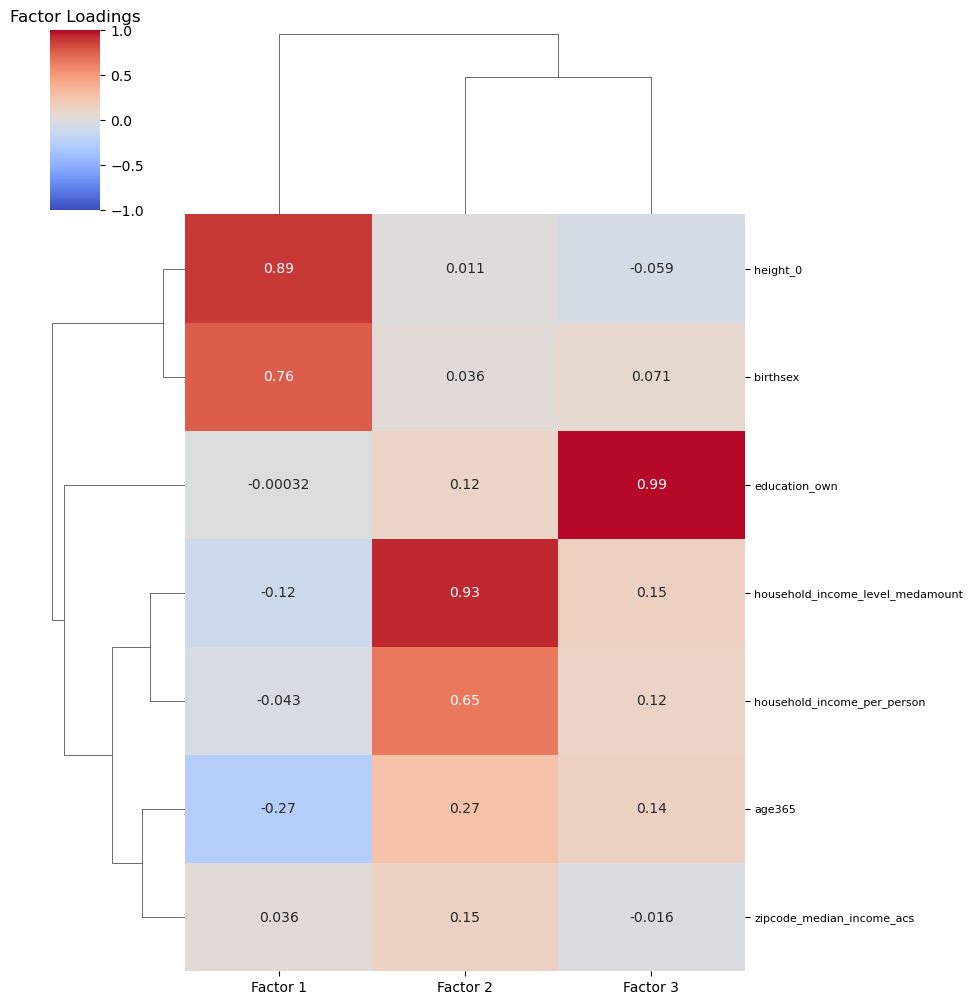

In [ ]:

fa_loadings_demographic_3 = DevCvExploratoryTools.do_factor_analysis(data_demographic, 3)
loadings_labelled_3 = DevCvExploratoryTools.label_factor_loadings(fa_loadings_demographic_3, data_demographic)

DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled_3)

I don't think we need to examine just codebook-included demographics. Based on these results, income can probably be seprated from education; we don't have income at all though! We should include household income_per_person because it is so weakly linked to education. It should replace cSES, which we eliminate because of how many null values it has.

## Neural

In [ ]:
#remove any rows where any values are NA
roi_measures = roi_data.dropna()
roi_measures.drop(['subject_id'], axis=1, inplace=True)

/var/folders/cj/4mb6t1f906j397tj71pxfxz00000gn/T/ipykernel_15661/1069341853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_measures.drop(['subject_id'], axis=1, inplace=True)


/Users/benjaminsmith/opt/anaconda3/envs/dataanalysis/lib/python3.11/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


Bartlett's test of sphericity chisq, p-value:
10374.955656325166 0.0
KMO test of sampling adequacy:
0.7696167924023372
generating screeplot....


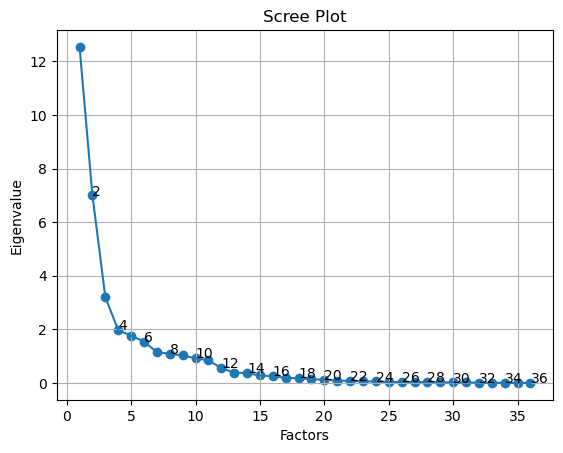

In [ ]:
#first calculate factor analysis validity
DevCvExploratoryTools.calculate_fa_validity(roi_measures)
#now do a diagnostic fa
DevCvExploratoryTools.do_diagnostic_fa(roi_measures)

In [ ]:
fa_loadings_roi = DevCvExploratoryTools.do_factor_analysis(roi_measures, 3)
loadings_labelled_3 = DevCvExploratoryTools.label_factor_loadings(fa_loadings_roi, roi_measures)


(36, 3)


<Figure size 1000x1000 with 0 Axes>

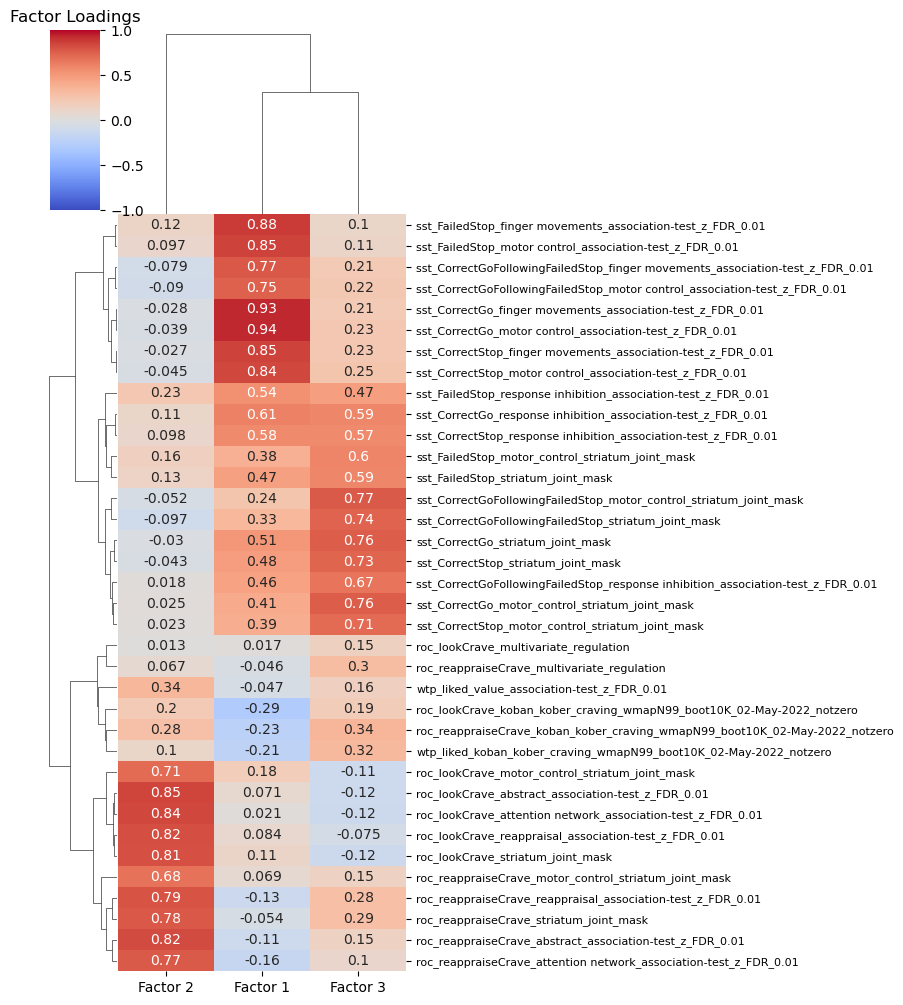

In [ ]:
DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled_3)

### Codebook restricted

In [ ]:
data_neural_chosen = roi_data.loc[:,roi_data.columns.isin(aim3_predictors)]

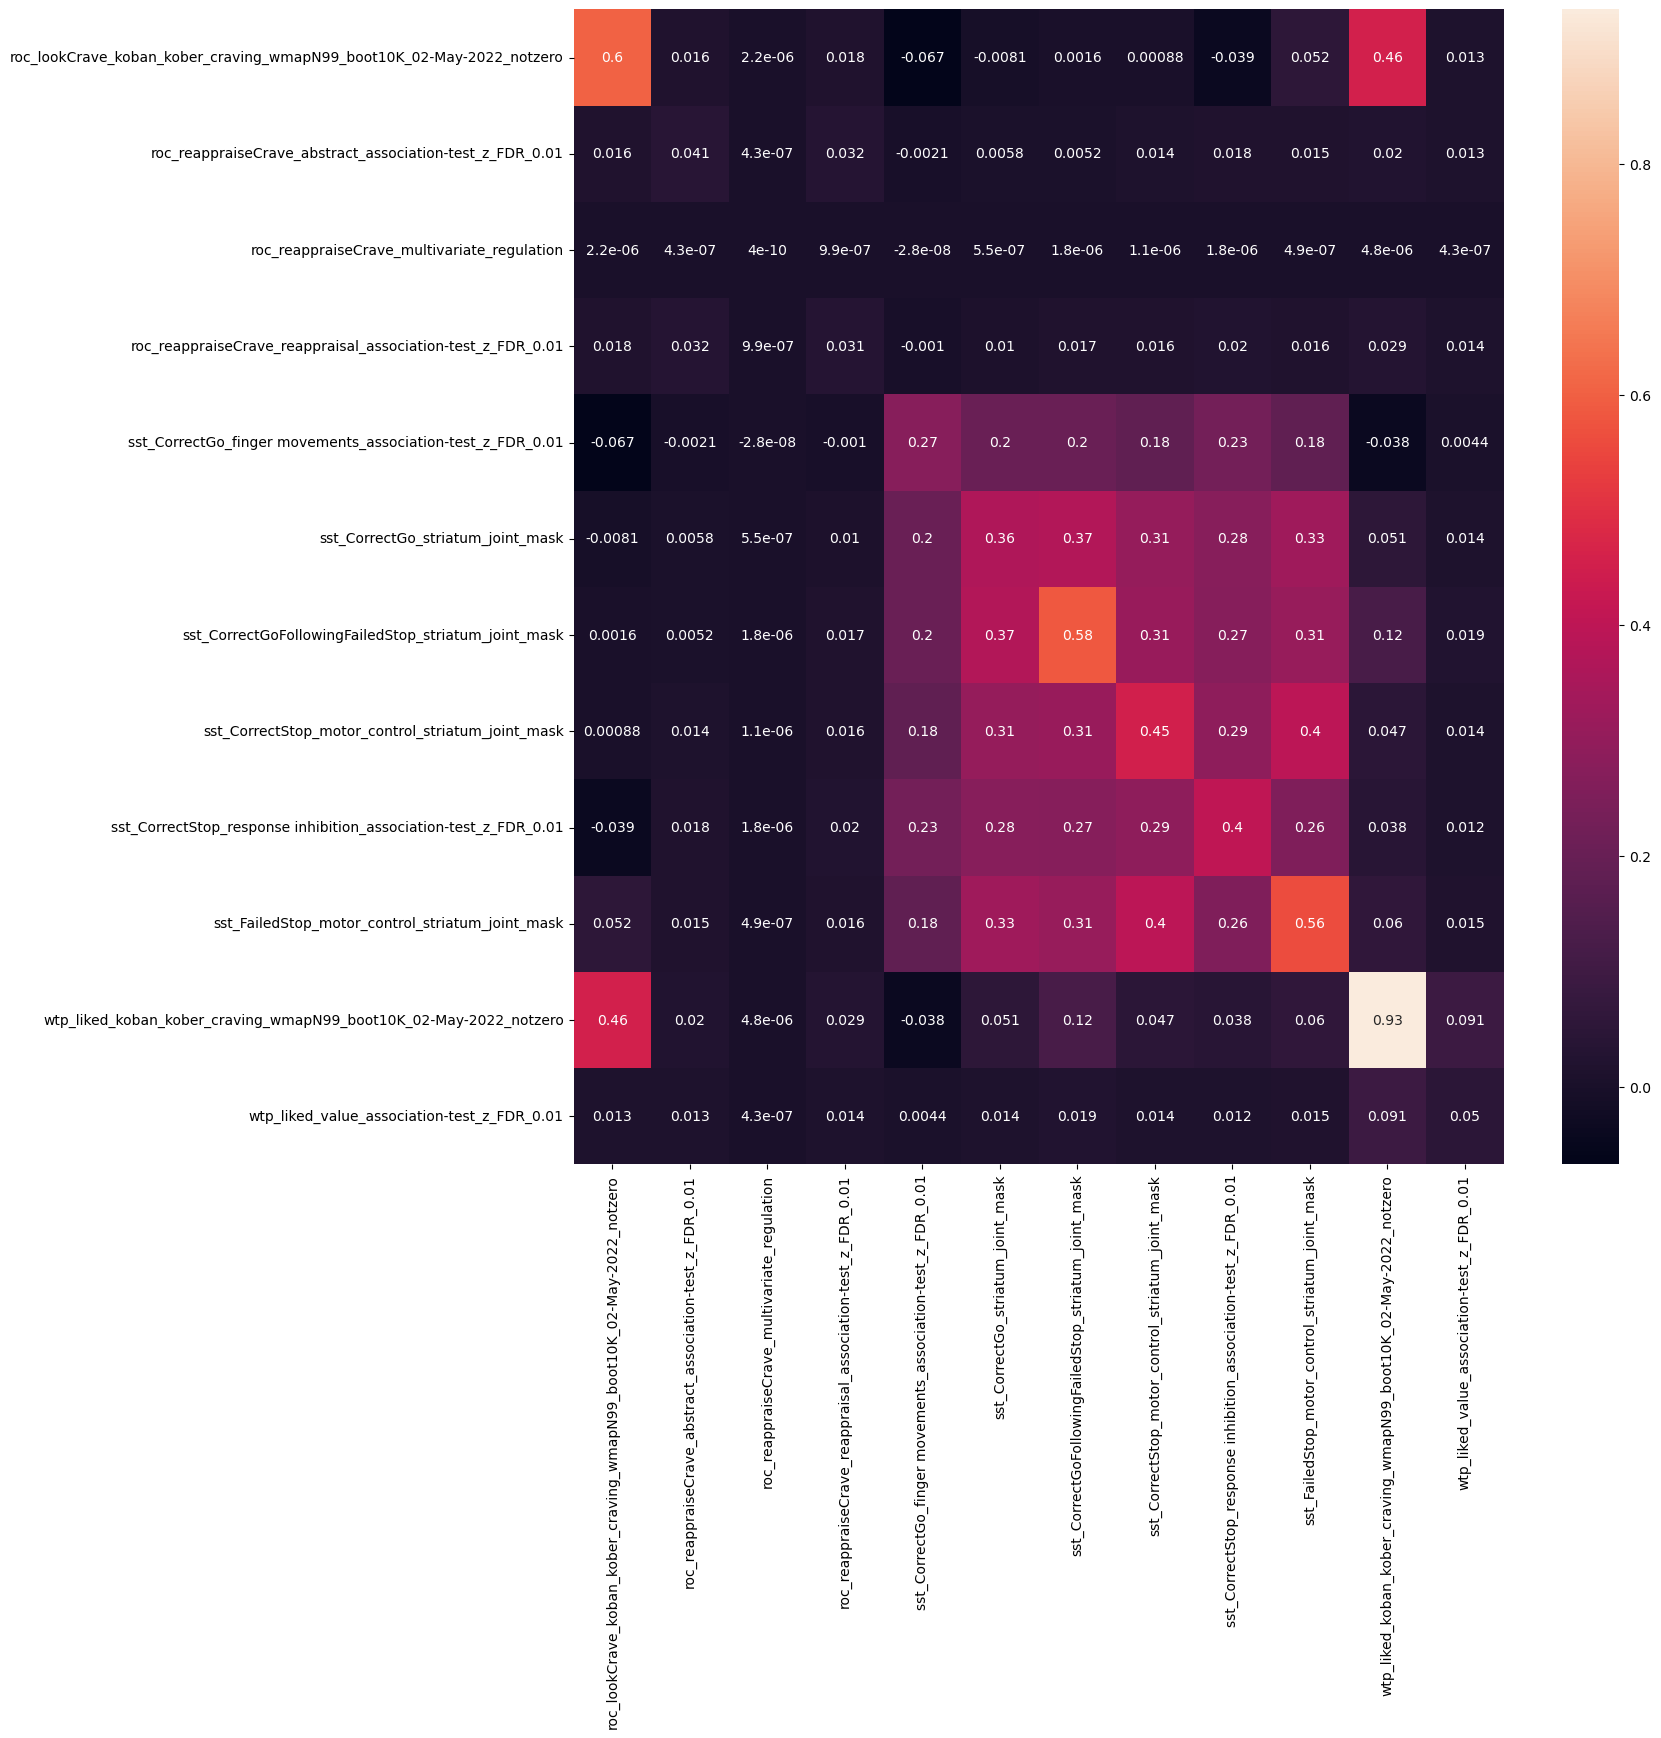

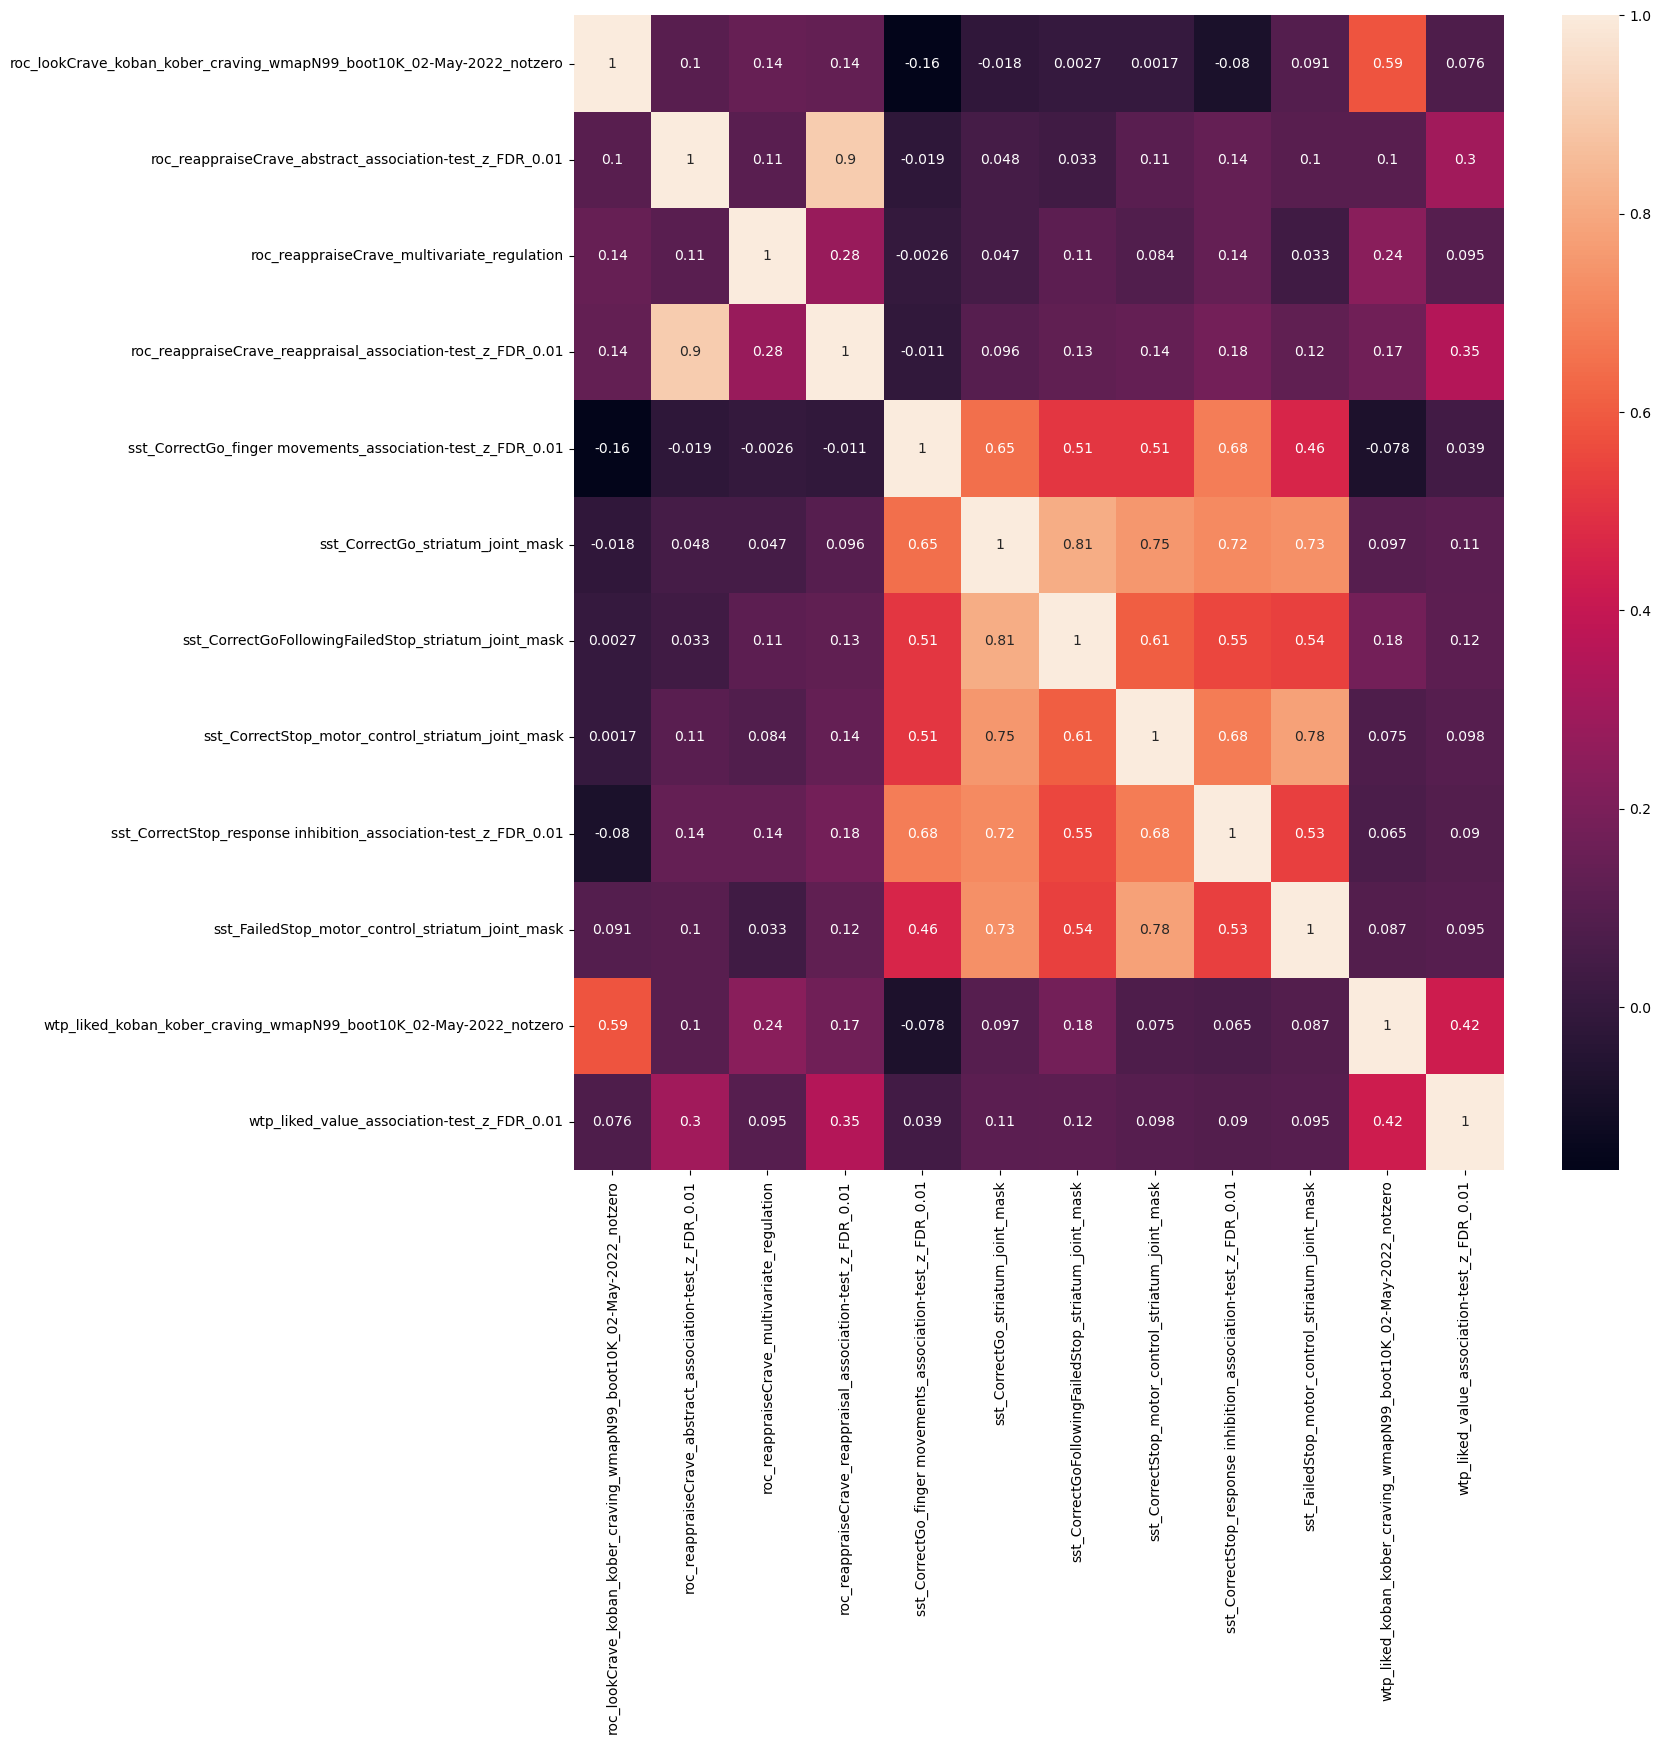

In [ ]:

DevCvExploratoryTools.do_cov_mat(data_neural_chosen)
DevCvExploratoryTools.do_corr_mat(data_neural_chosen)



generating screeplot....


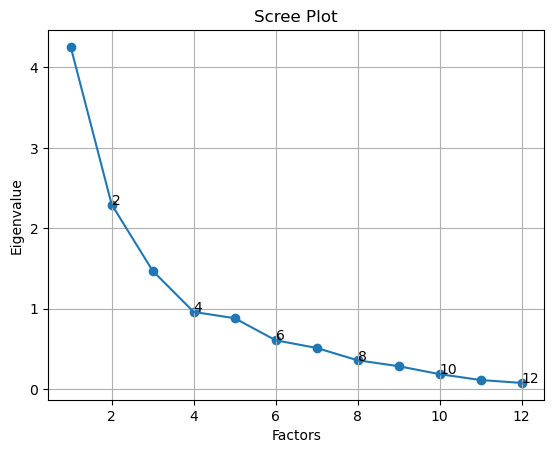

In [ ]:


#now do a diagnostic fa

DevCvExploratoryTools.do_diagnostic_fa(data_neural_chosen)



In [ ]:
fa_loadings_roi = DevCvExploratoryTools.do_factor_analysis(data_neural_chosen, 4)
loadings_labelled_4 = DevCvExploratoryTools.label_factor_loadings(fa_loadings_roi, data_neural_chosen)


(12, 4)


<Figure size 1000x1000 with 0 Axes>

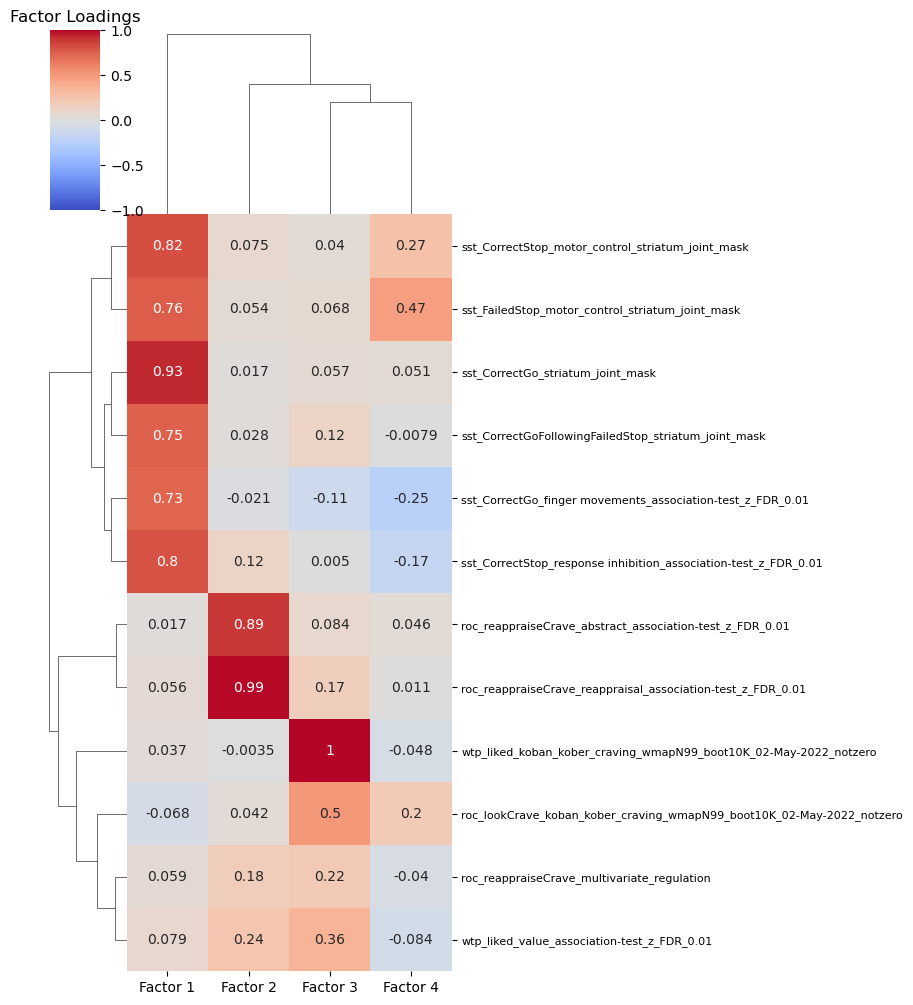

In [ ]:
DevCvExploratoryTools.display_factor_loadings_in_plot(loadings_labelled_4)

Based on this analysis, our SST measures are all highly correlated. As they measure distinct constructs, that seems like a reason to be cautious about SST overall. Let's include the Stop Signal motor control striatum joint mask.

The result might be indicative of a processing error, and these should probably be followed up somehow.

ROC abstract and reappraisal masks give very simliar result, so let's eliminate the ROC abstract mask. 

The kober craving mask is remarkably similar across WTP and ROC. If possible, let's get the _combined_ measure of it across those two. WTP_liked is still distinct enough to keep.

In [ ]:
##

# Summary of changes to make as a result of this report

Self-report: 
- New “Restraint” factor measuring:
  - RS 
  - TRSQ
  - RMQ_Assessment
- New “Planning” factor measuring:
  - PLAN Cognitive Strategies
  - PLAN Temporal Orientation
  - BSCS
  - PLAN_mental_flexibility
- Replace FCI_liked and FCI_craved with the aggregate measures “FCI_liked_craved_sum” and “FCI_craved_minus_liked”
- Replace IMI_effort_importance and IMI_interest_enjoyment with one “IMI_aggregate” scale


Behavioral:
- replace SST_mean_SSD with SST_PostErrorSlowW1_median
- Add ROC_Crave_Minus_neutral

Demographics:
- Remove cSES (too many null values) (unless we can fix the null values)
- add household_income_per_person
- continue to include eucation_own
- do not include height


Neural:

- If possible, investigate why all the SST measures are so highly correlated 
- For now, include only sst_CorrectStop_response_inhibition_association_test and SST_FailedStop_motor_control-striatum_mask
- no ROC abstract mask because it is so similar to reappraisal
- Get combined measure of kober craving mask across WTP and ROC




data_by_ppt

In [ ]:
data_by_ppt

SID  cancer_promoting_minus_preventing_FCI  \
0     DEV001                              -0.134946   
1     DEV002                              -0.541398   
2     DEV004                               0.113978   
3     DEV005                               0.083871   
4     DEV006                               0.430645   
...      ...                                    ...   
1064  DEV311                              -0.603226   
1065  DEV312                               0.223118   
1066  DEV312                               0.223118   
1067  DEV312                               0.223118   
1068  DEV312                               0.223118   

      cancer_promoting_minus_preventing_FFQ  \
0                                 -0.113462   
1                                 -0.682692   
2                                 -0.698077   
3                                  0.321154   
4                                 -0.603846   
...                                     ...   
1064                              -0.709615   
1065                              -1.011538   
1066                              -1.011538   
1067                              -1.011538   
1068                              -1.011538   

      cancer_promoting_minus_preventing_craved_FCI  \
0                                        -0.020430   
1                                        -0.903226   
2                                         0.023656   
3                                         0.044086   
4                                         0.449462   
...                                            ...   
1064                                     -0.620430   
1065                                      0.626882   
1066                                      0.626882   
1067                                      0.626882   
1068                                      0.626882   

      cancer_promoting_minus_preventing_craved_FFQ  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
1064                                           NaN   
1065                                           NaN   
1066                                           NaN   
1067                                           NaN   
1068                                           NaN   

      cancer_promoting_minus_preventing_liked_FCI  \
0                                       -0.249462   
1                                       -0.179570   
2                                        0.204301   
3                                        0.123656   
4                                        0.411828   
...                                           ...   
1064                                    -0.586022   
1065                                    -0.180645   
1066                                    -0.180645   
1067                                    -0.180645   
1068                                    -0.180645   

      cancer_promoting_minus_preventing_liked_FFQ  cancer_promoting_FCI  \
0                                             NaN              2.548387   
1                                             NaN              2.741935   
2                                             NaN              2.580645   
3                                             NaN              2.483871   
4                                             NaN              2.580645   
...                                           ...                   ...   
1064                                          NaN              2.596774   
1065                                          NaN              2.306452   
1066                                          NaN              2.306452   
1067                                          NaN              2.306452   
1068                   